In [ ]:
import pandas as pd
df = pd.read_csv('./부동산_최종_데이터.csv')

# 데이터 확인

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,거래년도,자치구명,법정동명,일반주소,상세주소,건물명,건물주용도,건축년도,역세권여부,주변역,층정보,건물면적,규격,평수,평단가,위도,경도,거래가격
0,2010,강남구,대치동,강남구 대치동 동부센트레빌 아파트,강남구 대치동 0670-0000,동부센트레빌,아파트,2005,1,한티 수인분당선,24,161.47,대형,49,53877551,37.492796,127.055776,2640000000
1,2010,강남구,대치동,강남구 대치동 동부센트레빌 아파트,강남구 대치동 0670-0000,동부센트레빌,아파트,2005,1,한티 수인분당선,4,121.74,대형,37,48648649,37.492796,127.055776,1800000000
2,2010,강남구,대치동,강남구 대치동 동부센트레빌 아파트,강남구 대치동 0670-0000,동부센트레빌,아파트,2005,1,한티 수인분당선,25,145.83,대형,44,50454545,37.492796,127.055776,2220000000
3,2010,강남구,대치동,강남구 대치동 동부센트레빌 아파트,강남구 대치동 0670-0000,동부센트레빌,아파트,2005,1,한티 수인분당선,16,121.74,대형,37,51621622,37.492796,127.055776,1910000000
4,2010,강남구,대치동,강남구 대치동 동부센트레빌 아파트,강남구 대치동 0670-0000,동부센트레빌,아파트,2005,1,한티 수인분당선,19,161.47,대형,49,52755102,37.492796,127.055776,2585000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103076 entries, 0 to 1103075
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   거래년도    1103076 non-null  int64  
 1   자치구명    1103076 non-null  object 
 2   법정동명    1103076 non-null  object 
 3   일반주소    1103076 non-null  object 
 4   상세주소    1103076 non-null  object 
 5   건물명     1103076 non-null  object 
 6   건물주용도   1103076 non-null  object 
 7   건축년도    1103076 non-null  int64  
 8   역세권여부   1103076 non-null  int64  
 9   주변역     1103076 non-null  object 
 10  층정보     1103076 non-null  int64  
 11  건물면적    1103076 non-null  float64
 12  규격      1103076 non-null  object 
 13  평수      1103076 non-null  int64  
 14  평단가     1103076 non-null  int64  
 15  위도      1103076 non-null  float64
 16  경도      1103076 non-null  float64
 17  거래가격    1103076 non-null  int64  
dtypes: float64(3), int64(7), object(8)
memory usage: 151.5+ MB


In [ ]:
df["자치구명"].value_counts( )

강서구     74800
송파구     73609
노원구     64150
강동구     59504
양천구     58989
강남구     57785
은평구     52505
성북구     52324
구로구     51842
서초구     50459
마포구     49841
영등포구    47333
도봉구     45446
동작구     41193
관악구     39532
성동구     38435
중랑구     37385
서대문구    37181
동대문구    36814
강북구     30325
광진구     28079
금천구     24216
용산구     21841
중구      14913
종로구     14575
Name: 자치구명, dtype: int64

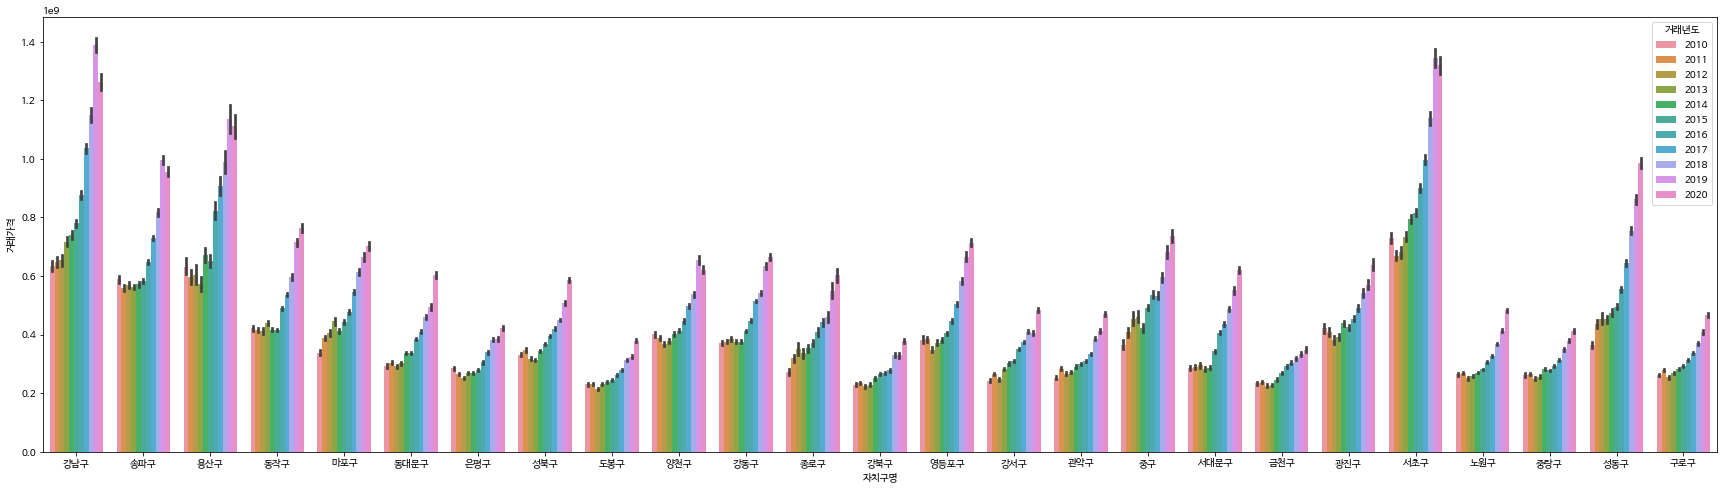

In [ ]:
plt.figure( figsize = ( 30, 8 ))
sns.barplot( x = "자치구명", y = "거래가격", data = df, hue = "거래년도")

# 불필요 column 제거

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11680-2010-9-0008334-1,1168010600106700000,11680,강남구,1168010600,대치동,2010,9,주택거래신고,1,NaN,161.47,0,24.0,2001,아파트,2640000000,2005.0,동부센트레빌
1,11380-2010-4-0012209-1,1138010400100130000,11380,은평구,1138010400,갈현동,2010,4,신고,1,41.42,102.10,0,-1.0,2002,연립주택,240000000,1995.0,성광빌라(479-196)
2,11680-2010-9-0008333-1,1168010100108260029,11680,강남구,1168010100,역삼동,2010,9,주택거래신고,1,NaN,71.78,0,9.0,2001,아파트,380000000,2004.0,역삼동우정에쉐르1
3,11380-2010-4-0012208-1,1138011400100940000,11380,은평구,1138011400,진관동,2010,4,신고,1,NaN,84.89,0,4.0,2001,아파트,410000000,2010.0,제각말(푸르지오6단지)
4,11680-2010-9-0008332-1,1168011800105270000,11680,강남구,1168011800,도곡동,2010,9,주택거래신고,1,NaN,134.90,0,3.0,2001,아파트,1895000000,2006.0,도곡렉슬


In [ ]:
df.dropna(axis=0, subset=['관리구분코드'], inplace=True)

In [ ]:
# df = 원본데이터에서 필요없는 일부 컬럼을 제거한 데이터 셋
# df_new = null값을 제거한 데이터 셋
# df_20xx = df_new의 '신고년도'별 분류
# df_new_1 = 지상층 정보
# df_20xxa = df_new_1의 '신고년도'별 분류
# df_new_2 = 지하층 정보
# df_20xxb = df_new_2의 '신고년도'별 분류

In [ ]:
df_new = df.copy()

In [ ]:
df_new['대지권면적'].fillna(0, inplace=True)

In [ ]:
df_new.dropna(axis=0, subset=['층정보', '건축년도'], inplace=True)

In [ ]:
df_new.reset_index(drop=True, inplace=True)

In [ ]:
df_new = df_new.astype({ "층정보" : "int64", "건축년도" : "int64" })

In [ ]:
df_new = df_new[df_new['건축년도'] != 0]

In [ ]:
df_new.head( )

,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물연면적,관리구분코드,층정보,건물주용도코드,건물주용도,거래가격,건축년도
0,11680,강남구,1168010600,대치동,2010,9,주택거래신고,1,0.00,161.47,0,24,2001,아파트,2640000000,2005
1,11380,은평구,1138010400,갈현동,2010,4,신고,1,41.42,102.10,0,-1,2002,연립주택,240000000,1995
2,11680,강남구,1168010100,역삼동,2010,9,주택거래신고,1,0.00,71.78,0,9,2001,아파트,380000000,2004
3,11380,은평구,1138011400,진관동,2010,4,신고,1,0.00,84.89,0,4,2001,아파트,410000000,2010
4,11680,강남구,1168011800,도곡동,2010,9,주택거래신고,1,0.00,134.90,0,3,2001,아파트,1895000000,2006


In [ ]:
df_new.isna( ).sum( )

시군구코드      0
자치구명       0
법정동코드      0
법정동명       0
신고년도       0
업무구분코드     0
업무구분       0
물건번호       0
대지권면적      0
건물연면적      0
관리구분코드     0
층정보        0
건물주용도코드    0
건물주용도      0
거래가격       0
건축년도       0
dtype: int64

In [ ]:
df_2010 = df_new[(df_new["신고년도"] == 2010)]
df_2011 = df_new[(df_new["신고년도"] == 2011)]
df_2012 = df_new[(df_new["신고년도"] == 2012)]
df_2013 = df_new[(df_new["신고년도"] == 2013)]
df_2014 = df_new[(df_new["신고년도"] == 2014)]
df_2015 = df_new[(df_new["신고년도"] == 2015)]
df_2016 = df_new[(df_new["신고년도"] == 2016)]
df_2017 = df_new[(df_new["신고년도"] == 2017)]
df_2018 = df_new[(df_new["신고년도"] == 2018)]
df_2019 = df_new[(df_new["신고년도"] == 2019)]
df_2020 = df_new[(df_new["신고년도"] == 2020)]

# 데이터 시각화

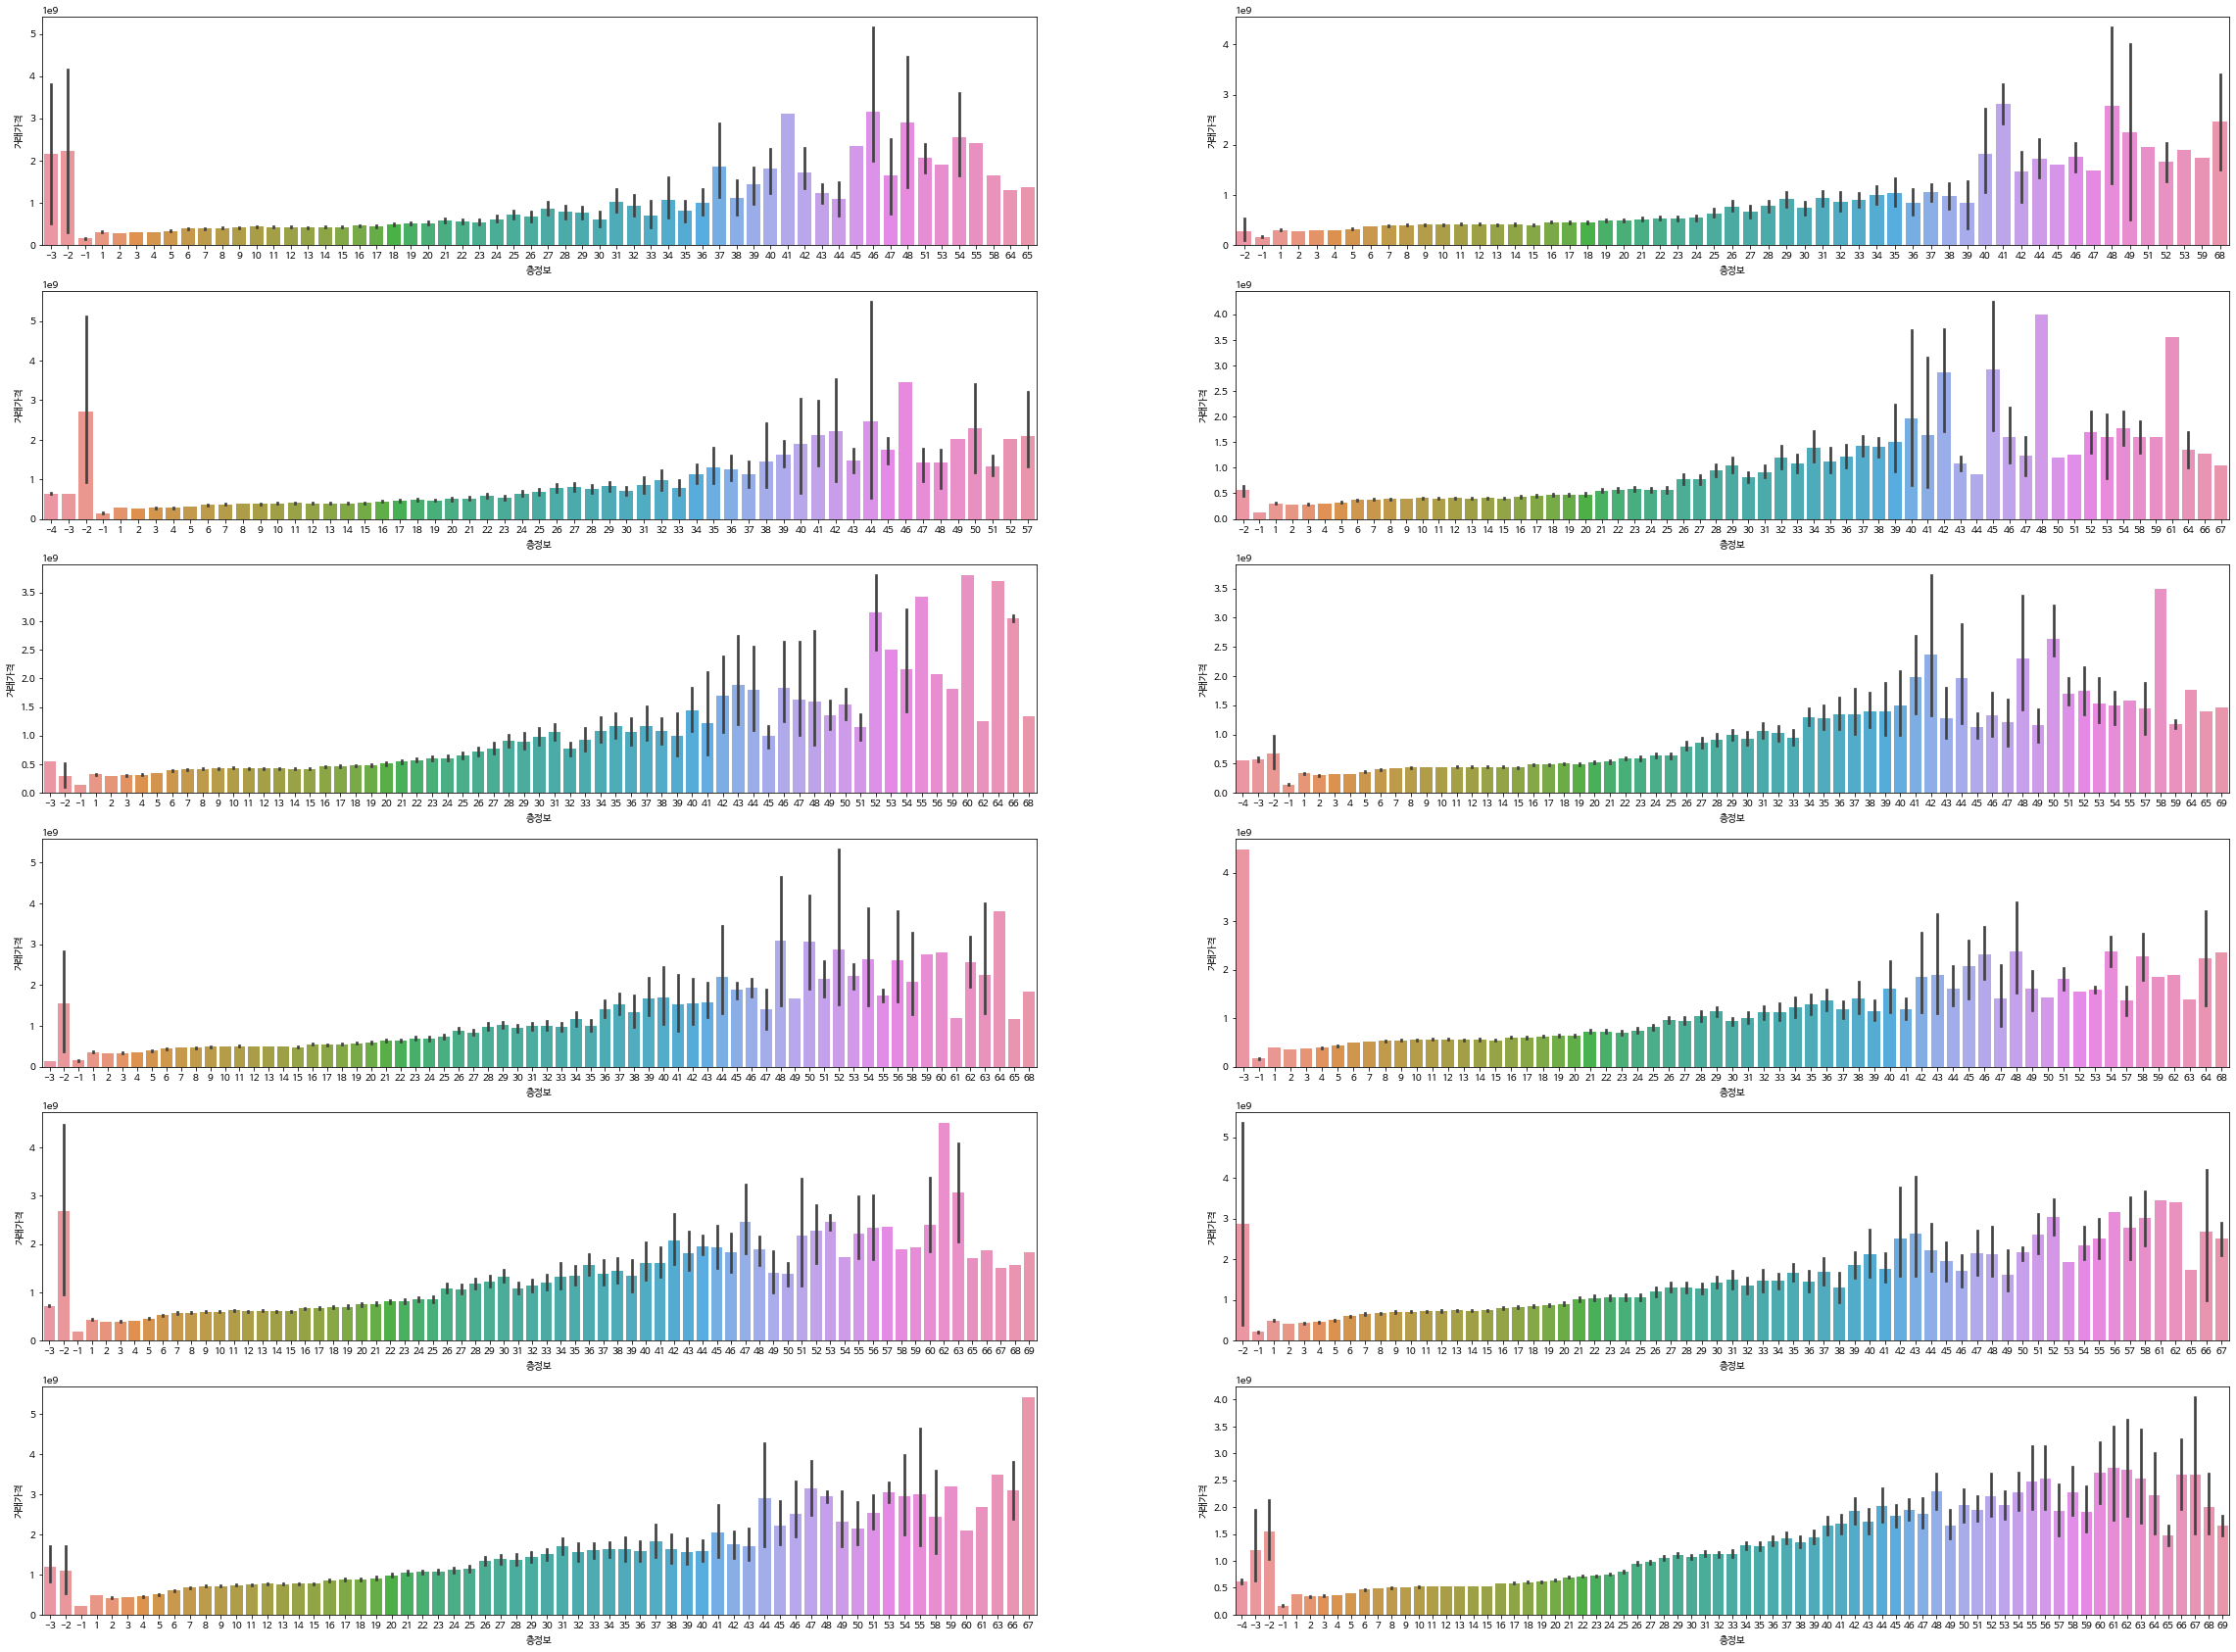

In [ ]:
# 년도별 층정보에 따른 거래가격 바그래프
# 고층일수록 가격에 비싸지만 일정 층수( 40층 이상 )에서는 층수보다는 다른 요소에 영향을 더 받음

fig, axes = plt.subplots(6,2, figsize=(40,30))
lst = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]

for i in range(len(lst)):
  plt.subplot(6,2,i+1)
  sns.barplot(x='층정보', y='거래가격', data=lst[i])

plt.subplot( 6, 2, 12)
sns.barplot(x='층정보', y='거래가격', data=df_new )

In [ ]:
df_new_1 = df_new[(df_new["층정보"] > 0 )]

In [ ]:
df_new_1.reset_index( drop = True )

,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물연면적,관리구분코드,층정보,건물주용도코드,건물주용도,거래가격,건축년도
0,11680,강남구,1168010600,대치동,2010,9,주택거래신고,1,0.00,161.47,0,24,2001,아파트,2640000000,2005
1,11680,강남구,1168010100,역삼동,2010,9,주택거래신고,1,0.00,71.78,0,9,2001,아파트,380000000,2004
2,11380,은평구,1138011400,진관동,2010,4,신고,1,0.00,84.89,0,4,2001,아파트,410000000,2010
3,11680,강남구,1168011800,도곡동,2010,9,주택거래신고,1,0.00,134.90,0,3,2001,아파트,1895000000,2006
4,11380,은평구,1138011400,진관동,2010,4,신고,1,0.00,59.71,0,4,2001,아파트,254000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410028,11440,마포구,1144012500,성산동,2020,4,신고,1,0.00,84.98,0,6,2001,아파트,600000000,2006
1410029,11440,마포구,1144012400,연남동,2020,4,신고,1,33.91,57.02,0,4,2002,연립주택,450000000,2007
1410030,11440,마포구,1144012500,성산동,2020,4,신고,1,33.65,56.48,0,4,2002,연립주택,300000000,1993
1410031,11440,마포구,1144010100,아현동,2020,4,신고,1,0.00,98.88,0,7,2001,아파트,800000000,1972


In [ ]:
df_2010a = df_new_1[(df_new_1["신고년도"] == 2010)]
df_2011a = df_new_1[(df_new_1["신고년도"] == 2011)]
df_2012a = df_new_1[(df_new_1["신고년도"] == 2012)]
df_2013a = df_new_1[(df_new_1["신고년도"] == 2013)]
df_2014a = df_new_1[(df_new_1["신고년도"] == 2014)]
df_2015a = df_new_1[(df_new_1["신고년도"] == 2015)]
df_2016a = df_new_1[(df_new_1["신고년도"] == 2016)]
df_2017a = df_new_1[(df_new_1["신고년도"] == 2017)]
df_2018a = df_new_1[(df_new_1["신고년도"] == 2018)]
df_2019a = df_new_1[(df_new_1["신고년도"] == 2019)]
df_2020a = df_new_1[(df_new_1["신고년도"] == 2020)]

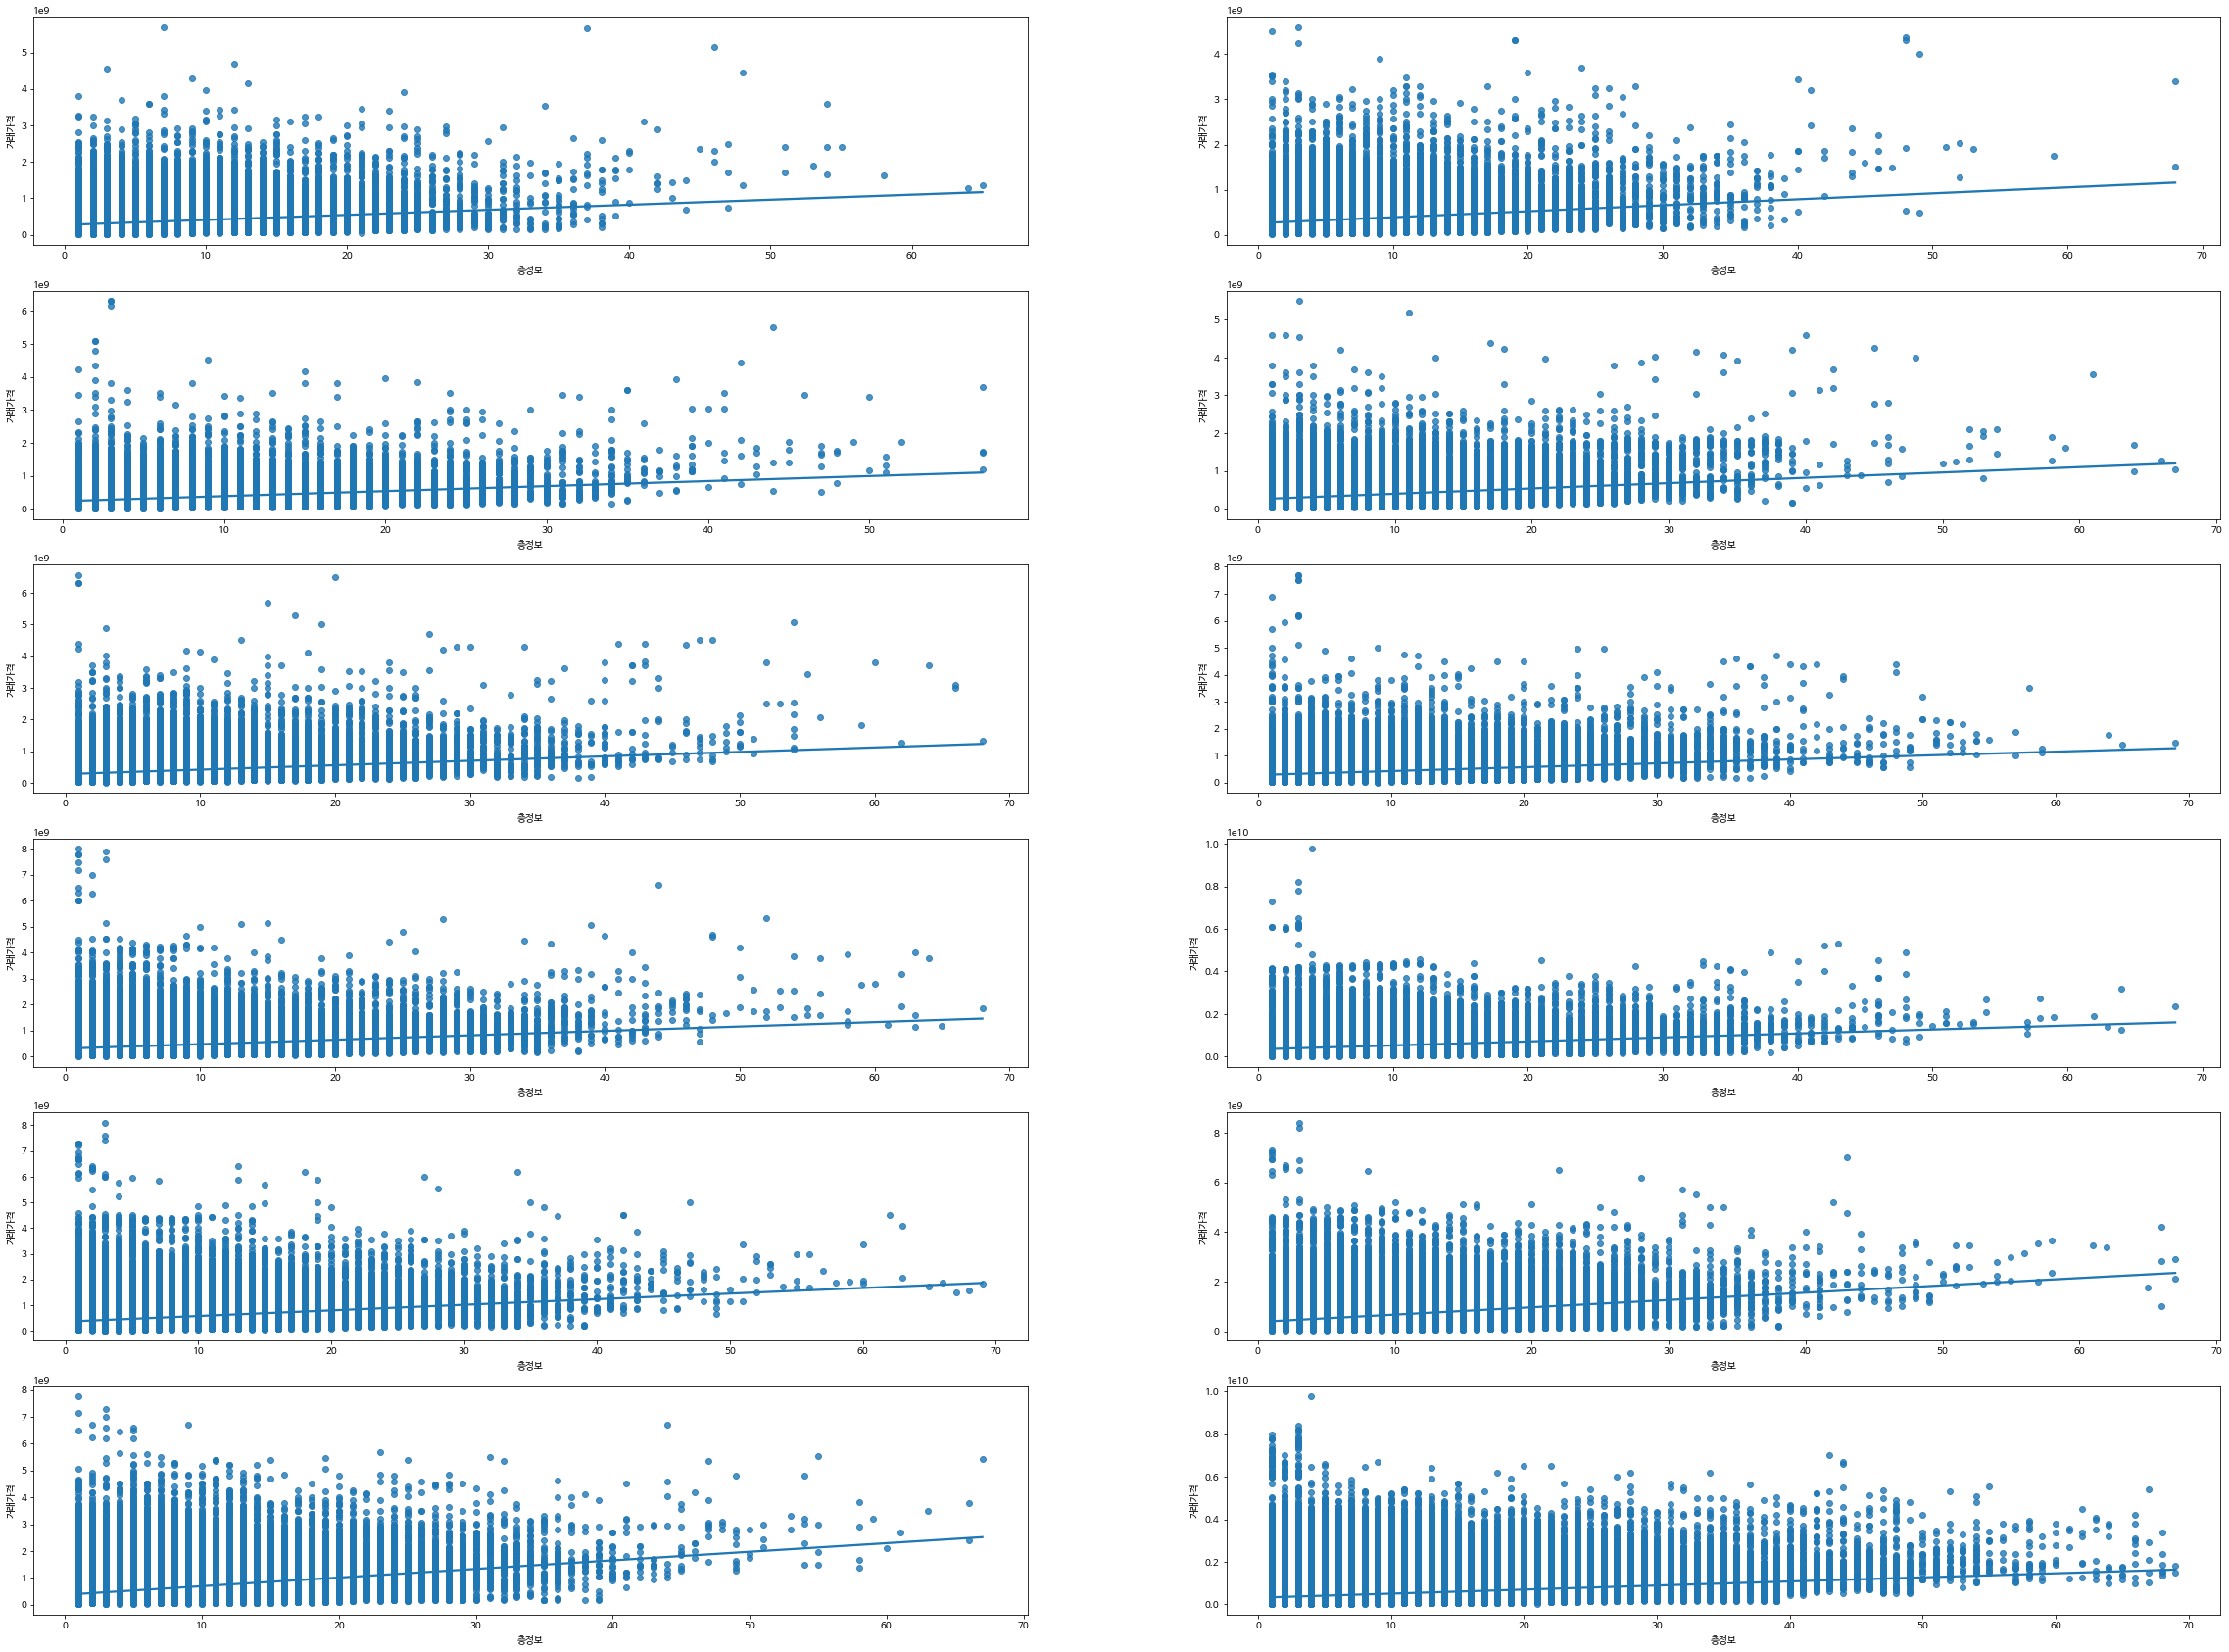

In [ ]:
# 년도별 층정보에 따른 거래가격 바그래프 ( 지상 )
# 선형 회귀선을 그려봤을때 층이 높을수록 가격이 증가한다는 정보를 확인 할 수 있음

fig, axes = plt.subplots(6,2, figsize=(40,30))
lst2 = [df_2010a,df_2011a,df_2012a,df_2013a,df_2014a,df_2015a,df_2016a,df_2017a,df_2018a,df_2019a,df_2020a]

for i in range(len(lst)):
  plt.subplot(6,2,i+1)
  sns.regplot(x='층정보', y='거래가격', data=lst2[i], fit_reg = True )

plt.subplot( 6, 2, 12 )
sns.regplot(x='층정보', y='거래가격', data=df_new_1, fit_reg = True )

In [ ]:
df_new_2 = df_new[(df_new["층정보"] < 0 )]

In [ ]:
df_new_2.reset_index( drop = True )

,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물연면적,관리구분코드,층정보,건물주용도코드,건물주용도,거래가격,건축년도
0,11380,은평구,1138010400,갈현동,2010,4,신고,1,41.42,102.10,0,-1,2002,연립주택,240000000,1995
1,11380,은평구,1138010700,응암동,2010,4,신고,1,16.99,34.11,0,-1,2002,연립주택,110000000,1994
2,11380,은평구,1138010200,녹번동,2010,4,신고,1,16.47,21.27,0,-1,2002,연립주택,100000000,1990
3,11680,강남구,1168010400,청담동,2010,9,주택거래신고,1,0.00,241.88,0,-1,2001,아파트,2900000000,2010
4,11380,은평구,1138010300,불광동,2010,4,신고,1,20.42,44.65,0,-1,2002,연립주택,58000000,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32438,11440,마포구,1144012500,성산동,2020,4,신고,1,41.66,74.40,0,-1,2002,연립주택,220000000,1991
32439,11440,마포구,1144012300,망원동,2020,4,신고,1,50.44,81.24,0,-1,2002,연립주택,340000000,1991
32440,11440,마포구,1144012500,성산동,2020,4,신고,1,21.14,35.10,0,-1,2002,연립주택,150000000,1992
32441,11440,마포구,1144012500,성산동,2020,4,신고,1,27.38,36.57,0,-1,2002,연립주택,140000000,1989


In [ ]:
df_2010b = df_new_2[(df_new_2["신고년도"] == 2010)]
df_2011b = df_new_2[(df_new_2["신고년도"] == 2011)]
df_2012b = df_new_2[(df_new_2["신고년도"] == 2012)]
df_2013b = df_new_2[(df_new_2["신고년도"] == 2013)]
df_2014b = df_new_2[(df_new_2["신고년도"] == 2014)]
df_2015b = df_new_2[(df_new_2["신고년도"] == 2015)]
df_2016b = df_new_2[(df_new_2["신고년도"] == 2016)]
df_2017b = df_new_2[(df_new_2["신고년도"] == 2017)]
df_2018b = df_new_2[(df_new_2["신고년도"] == 2018)]
df_2019b = df_new_2[(df_new_2["신고년도"] == 2019)]
df_2020b = df_new_2[(df_new_2["신고년도"] == 2020)]

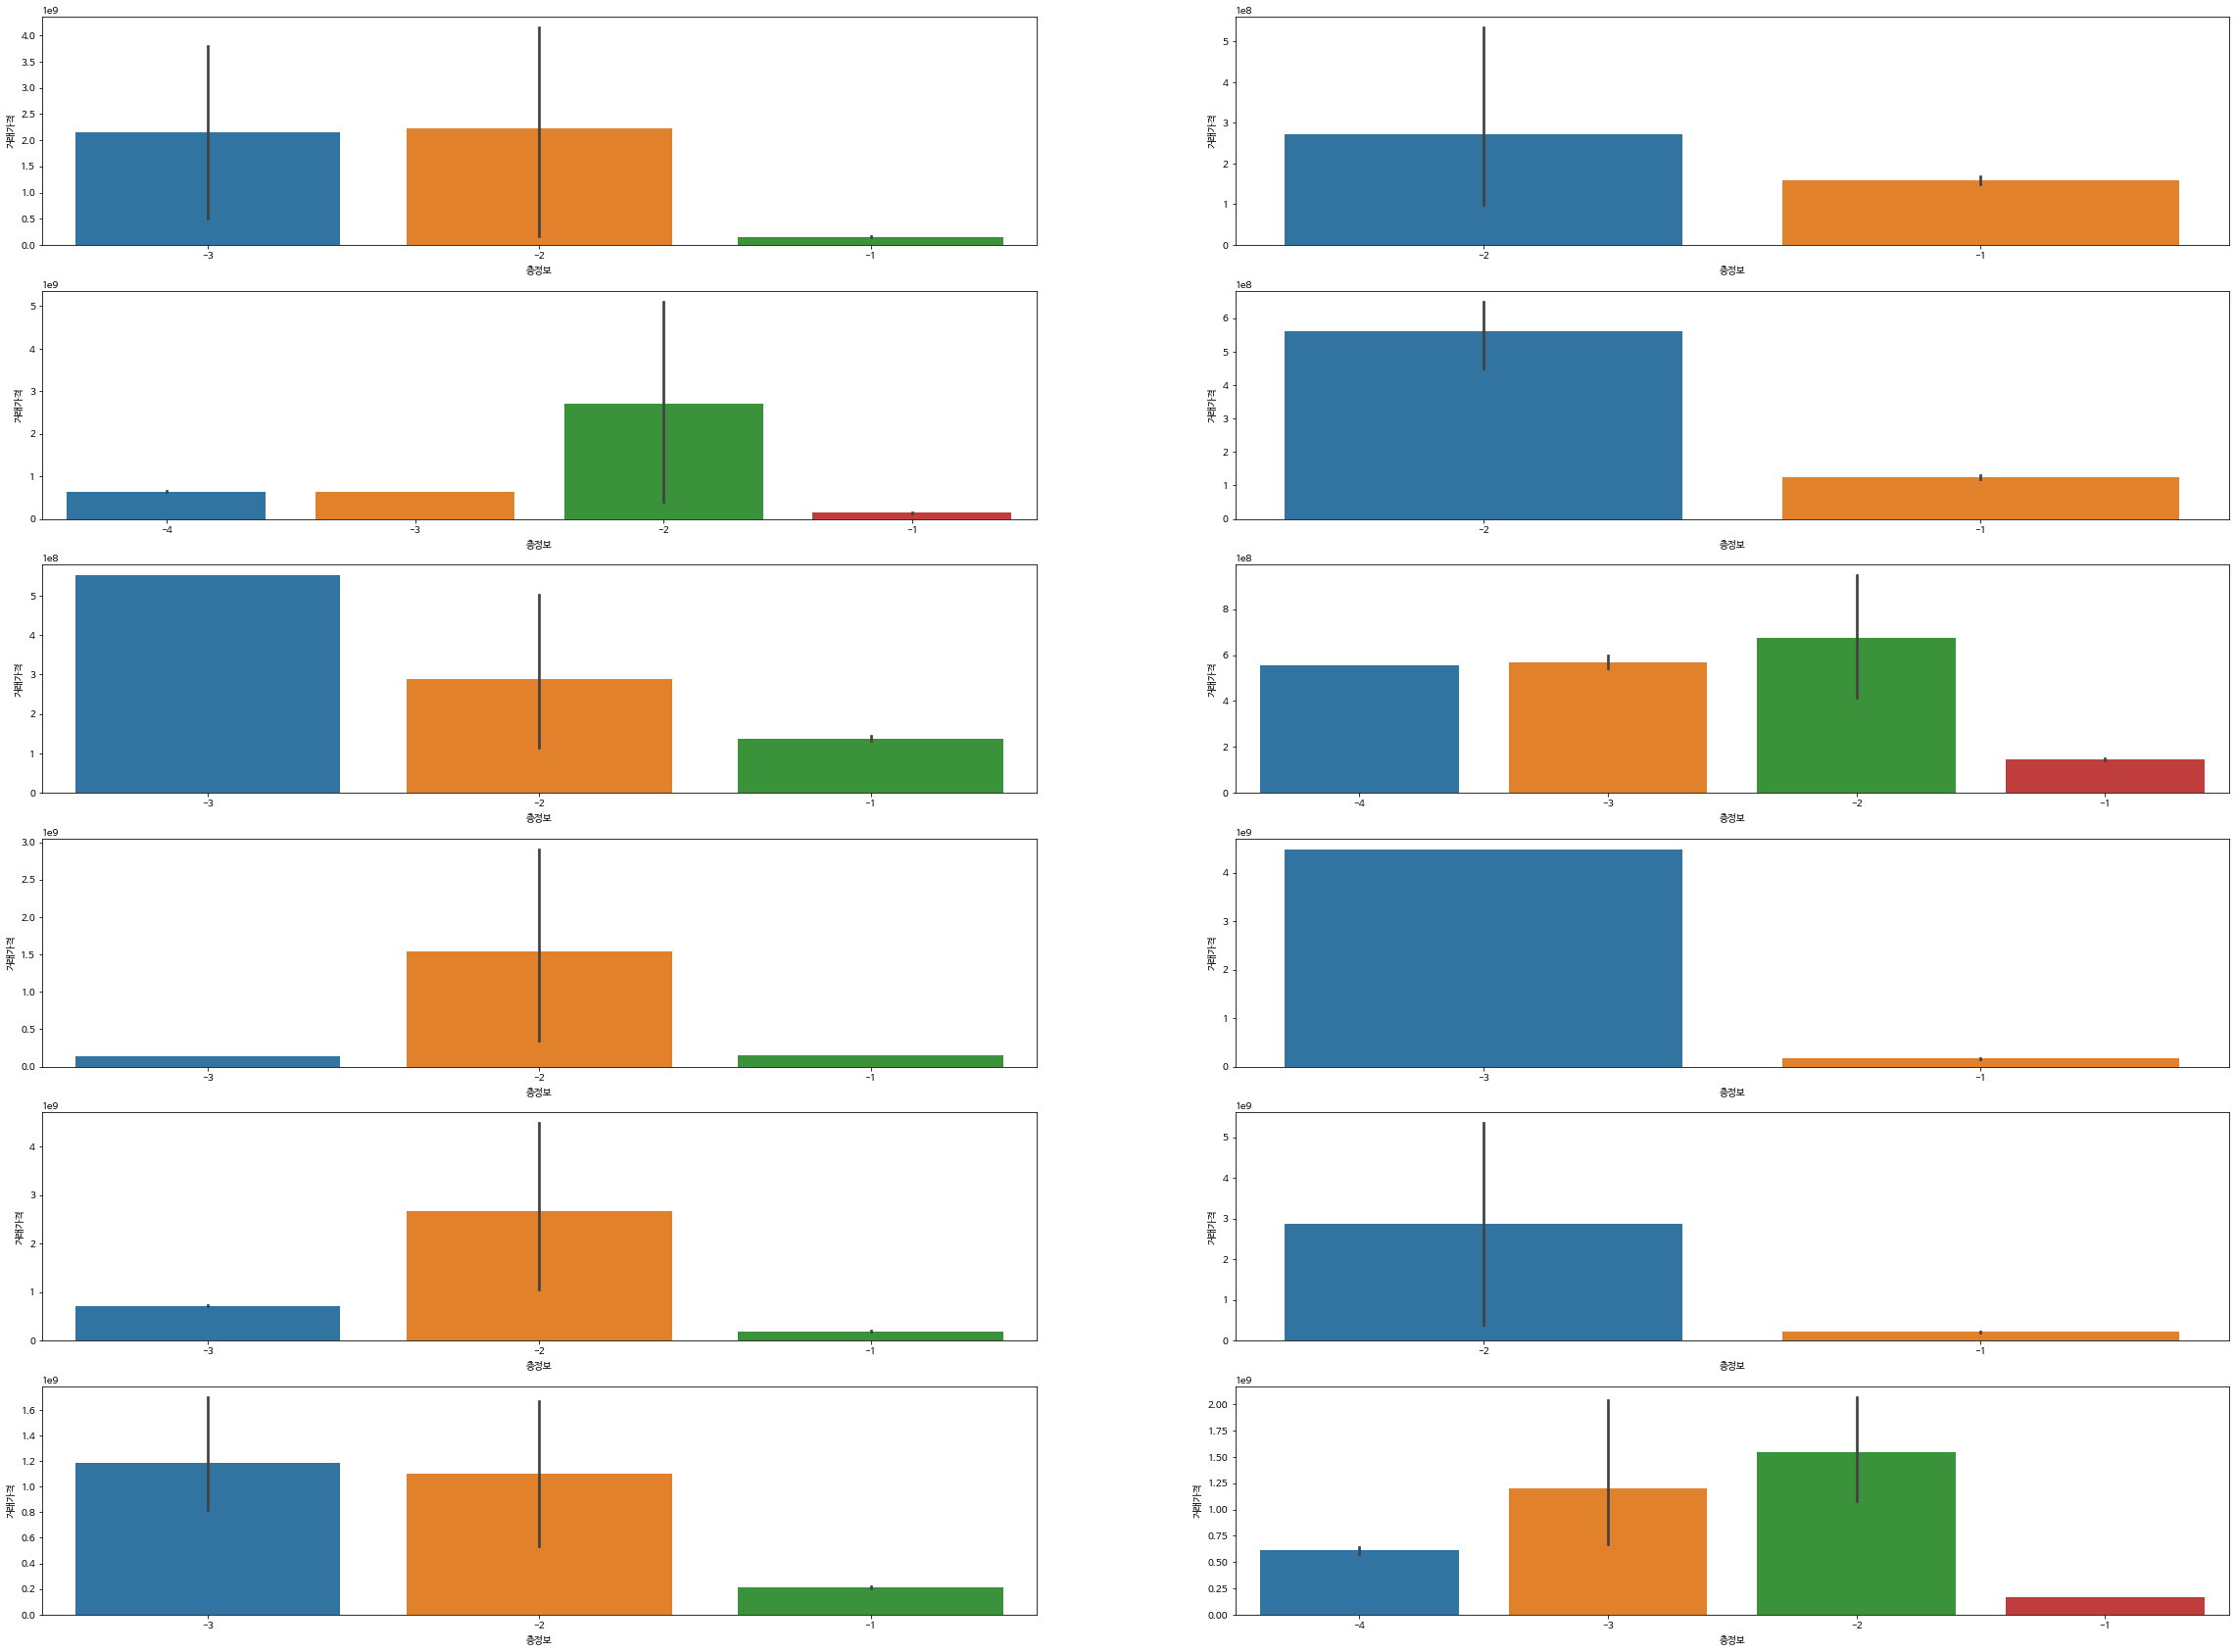

In [ ]:
# 년도별 층정보에 따른 거래가격 바그래프 ( 지하 )
# 지하 1층은 전반적으로 가격이 낮았으며 지하층수가 높아질수록( 절대값으로 ) 가격이 낮아지는 경향성이 있지만 지하 2층은 대부분의 년도에서 높은 거래가격을 유지함.

fig, axes = plt.subplots(6,2, figsize=(40,30))
lst3 = [df_2010b,df_2011b,df_2012b,df_2013b,df_2014b,df_2015b,df_2016b,df_2017b,df_2018b,df_2019b,df_2020b]

for i in range(len(lst)):
  plt.subplot(6,2,i+1)
  sns.barplot(x='층정보', y='거래가격', data=lst3[i])

plt.subplot( 6, 2, 12)
sns.barplot(x='층정보', y='거래가격', data=df_new_2 )

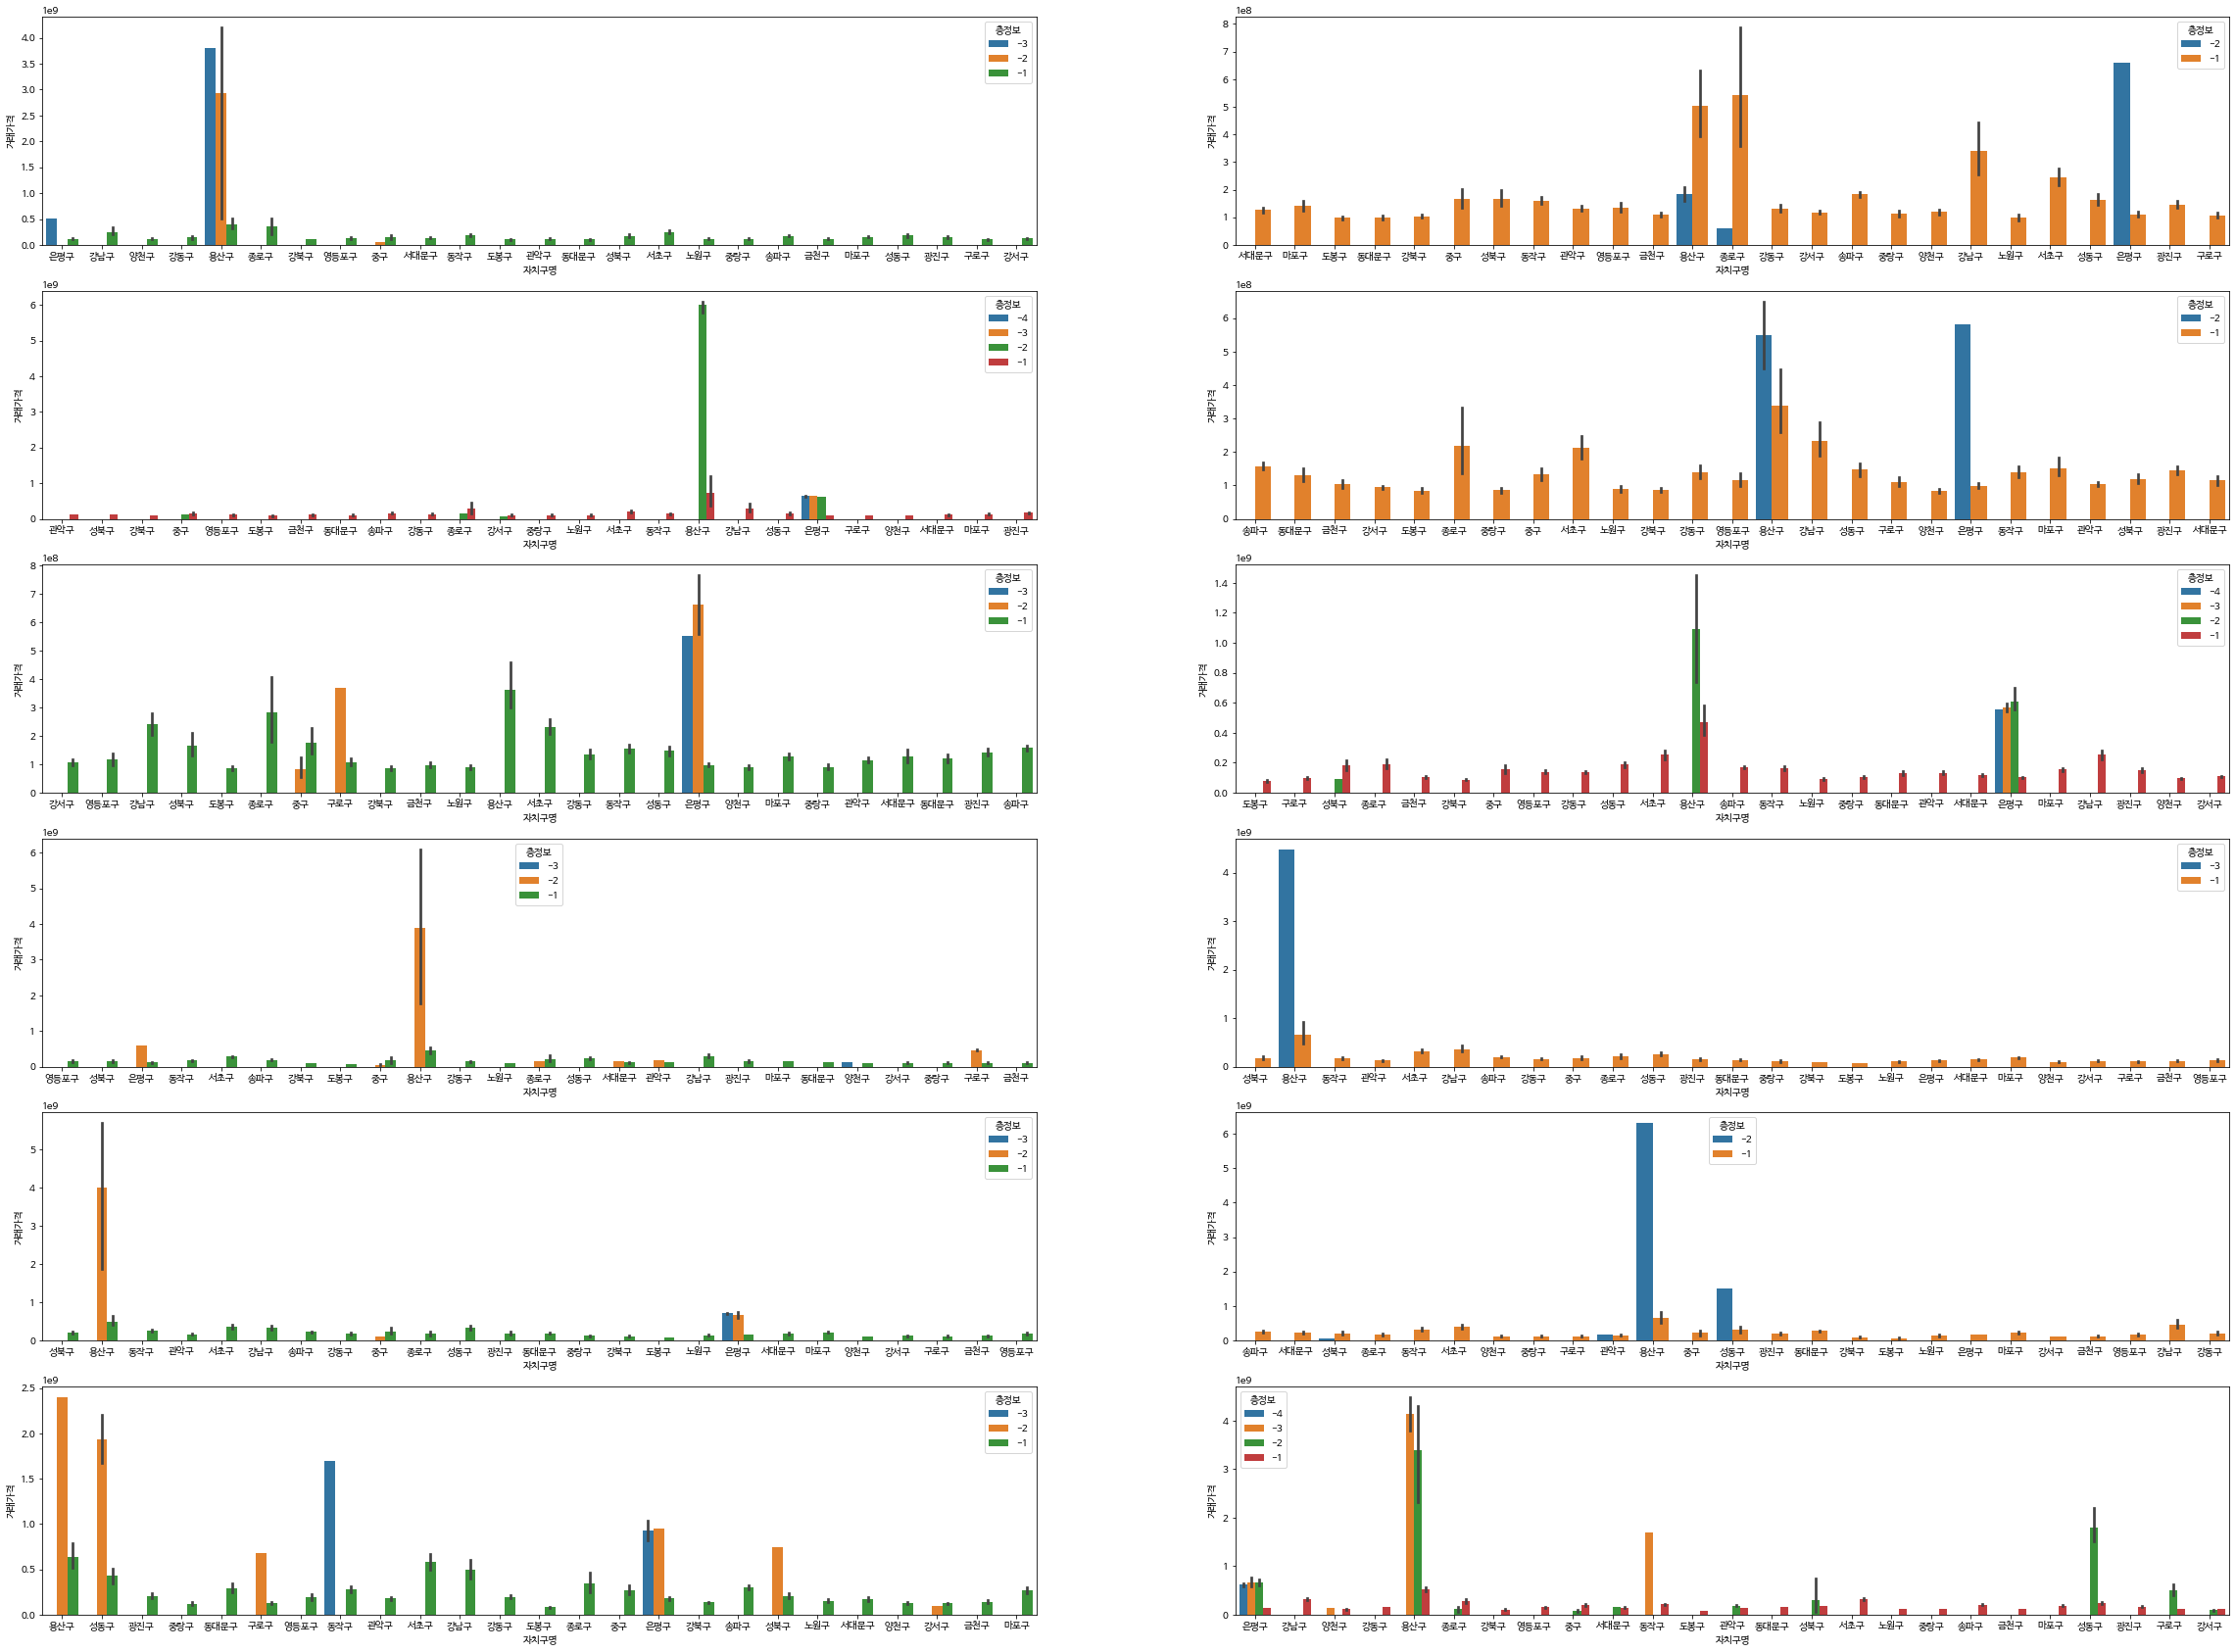

In [ ]:
# 지하층에 대해서 각 자치구에 따른 거래가격 그래프
# 특정 지역에 편중된 지하층을 볼 수 있음
# 기존 집값이 높던 강남, 서초이외에도 특정 몇몇 지역의 지하층 거래가가 높다는걸 확인할 수 있음
# 지하 2층의 강세를 확인 할 수 있음


fig, axes = plt.subplots(6,2, figsize=(40,30))
lst3 = [df_2010b,df_2011b,df_2012b,df_2013b,df_2014b,df_2015b,df_2016b,df_2017b,df_2018b,df_2019b,df_2020b]

for i in range(len(lst)):
  plt.subplot(6,2,i+1)
  sns.barplot(x='자치구명', y='거래가격', data=lst3[i], hue = '층정보')

plt.subplot( 6, 2, 12)
sns.barplot(x='자치구명', y='거래가격', data=df_new_2, hue = '층정보' )

In [ ]:
df_new[ "건축년도" ].value_counts( )

2003    86107
2004    83747
2002    78385
2005    57317
2000    51963
        ...  
1960        4
1962        3
1956        2
1925        2
2021        1
Name: 건축년도, Length: 65, dtype: int64

In [ ]:
df_12 = df_new[ "건축년도" ].unique( )

In [ ]:
df_12.sort( )

In [ ]:
df_12

array([1925, 1956, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
df_2010["건축년도"].unique( )

array([2005, 1995, 2004, 2010, 2006, 2009, 1983, 1994, 1978, 1980, 1987,
       1979, 2008, 1992, 2007, 1993, 1984, 2001, 1999, 2003, 2002, 1981,
       1977, 1982, 1997, 1988, 1996, 1991, 1990, 1967, 1986, 2000, 1998,
       1985, 1976, 1989, 1968, 1972, 1974, 1973, 1970, 1971, 1975, 1966,
       1969, 1965, 2016, 2018, 1964, 1961])

In [ ]:
df_2010[ df_2010["건축년도"] == 2018 ]

,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물연면적,관리구분코드,층정보,건물주용도코드,건물주용도,거래가격,건축년도
47031,11350,노원구,1135010600,중계동,2010,4,신고,1,0.0,59.84,0,18,2001,아파트,290000000,2018
47645,11350,노원구,1135010600,중계동,2010,4,신고,1,0.0,59.84,0,6,2001,아파트,295000000,2018
49590,11350,노원구,1135010600,중계동,2010,4,신고,1,0.0,84.98,0,15,2001,아파트,377000000,2018
51389,11350,노원구,1135010600,중계동,2010,4,신고,1,0.0,59.84,0,10,2001,아파트,260000000,2018
53293,11350,노원구,1135010600,중계동,2010,4,신고,1,0.0,59.84,0,5,2001,아파트,288000000,2018
55034,11350,노원구,1135010600,중계동,2010,4,신고,1,0.0,59.84,0,4,2001,아파트,260000000,2018
55430,11350,노원구,1135010600,중계동,2010,4,신고,1,0.0,59.84,0,7,2001,아파트,267000000,2018
55769,11350,노원구,1135010600,중계동,2010,4,신고,1,0.0,122.69,0,11,2001,아파트,585000000,2018


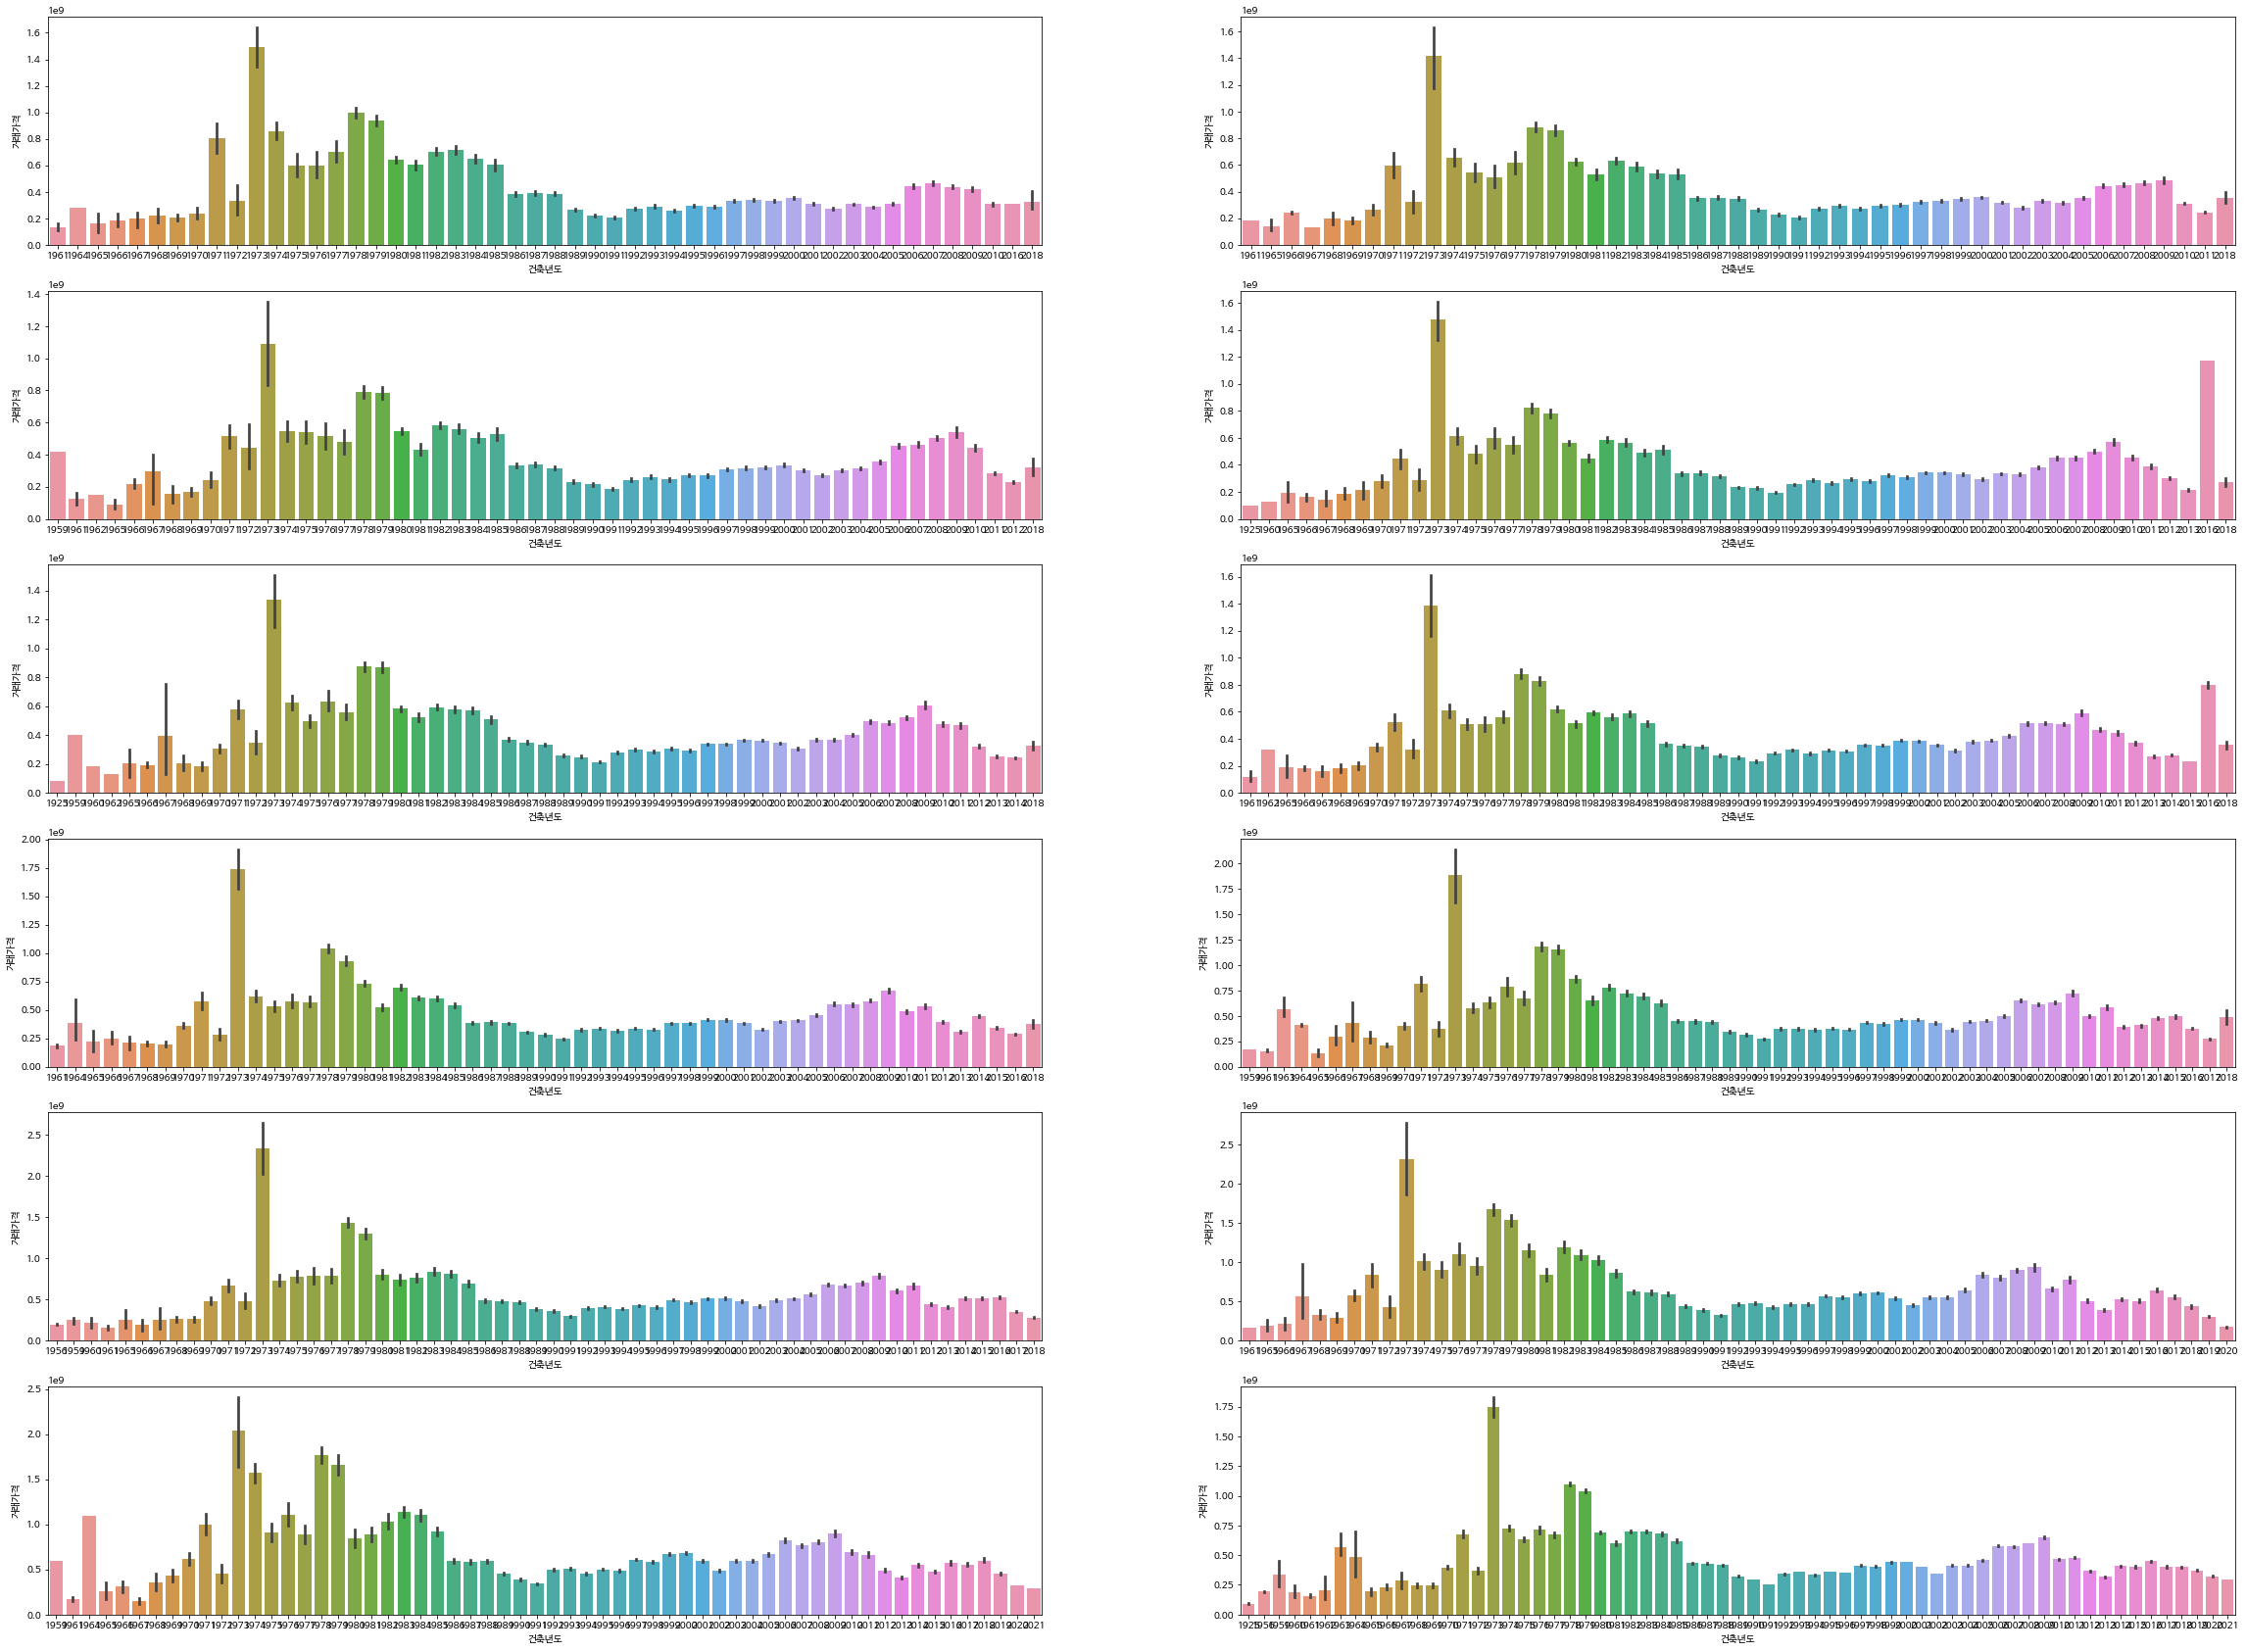

In [ ]:
fig, axes = plt.subplots(6,2, figsize=(40,30))
lst = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]

for i in range(len(lst)):
  plt.subplot(6,2,i+1)
  sns.barplot(x='건축년도', y='거래가격', data=lst[i])

plt.subplot( 6, 2, 12)
sns.barplot(x='건축년도', y='거래가격', data=df_new )

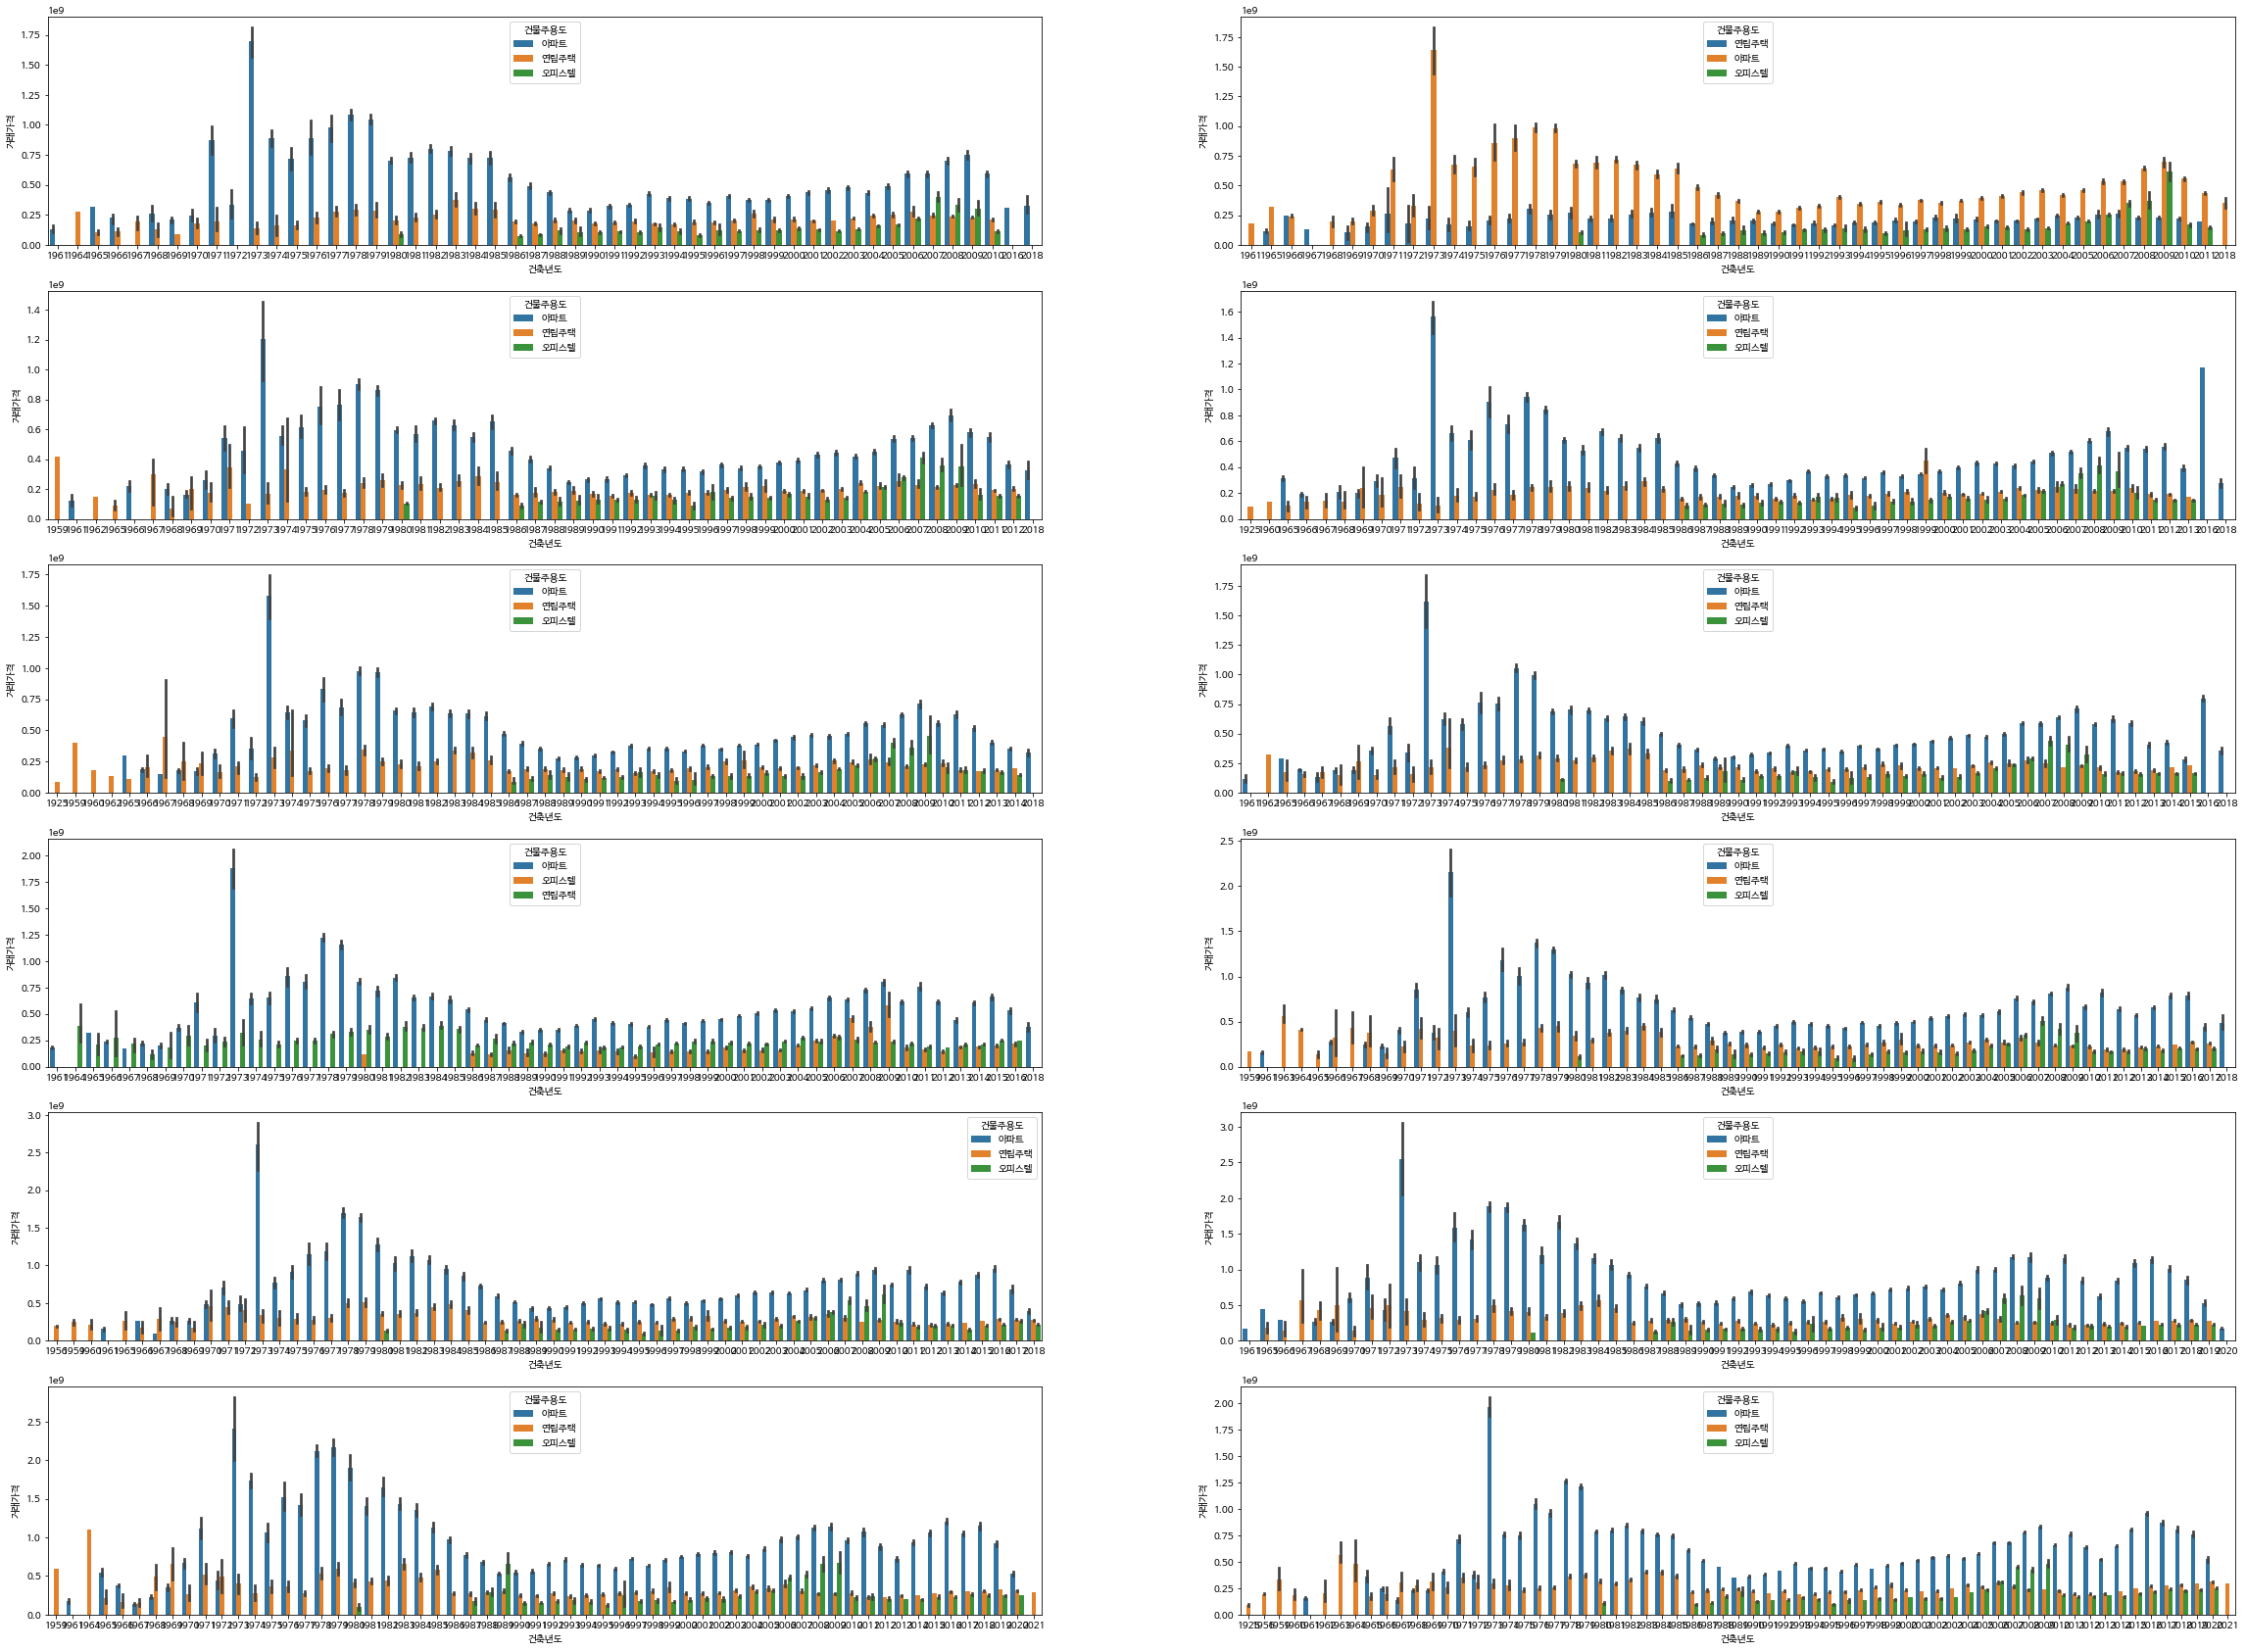

In [ ]:
fig, axes = plt.subplots(6,2, figsize=(40,30))
lst = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]

for i in range(len(lst)):
  plt.subplot(6,2,i+1)
  sns.barplot(x='건축년도', y='거래가격', data=lst[i], hue = '건물주용도')

plt.subplot( 6, 2, 12)
sns.barplot(x='건축년도', y='거래가격', data=df_new, hue = '건물주용도' )

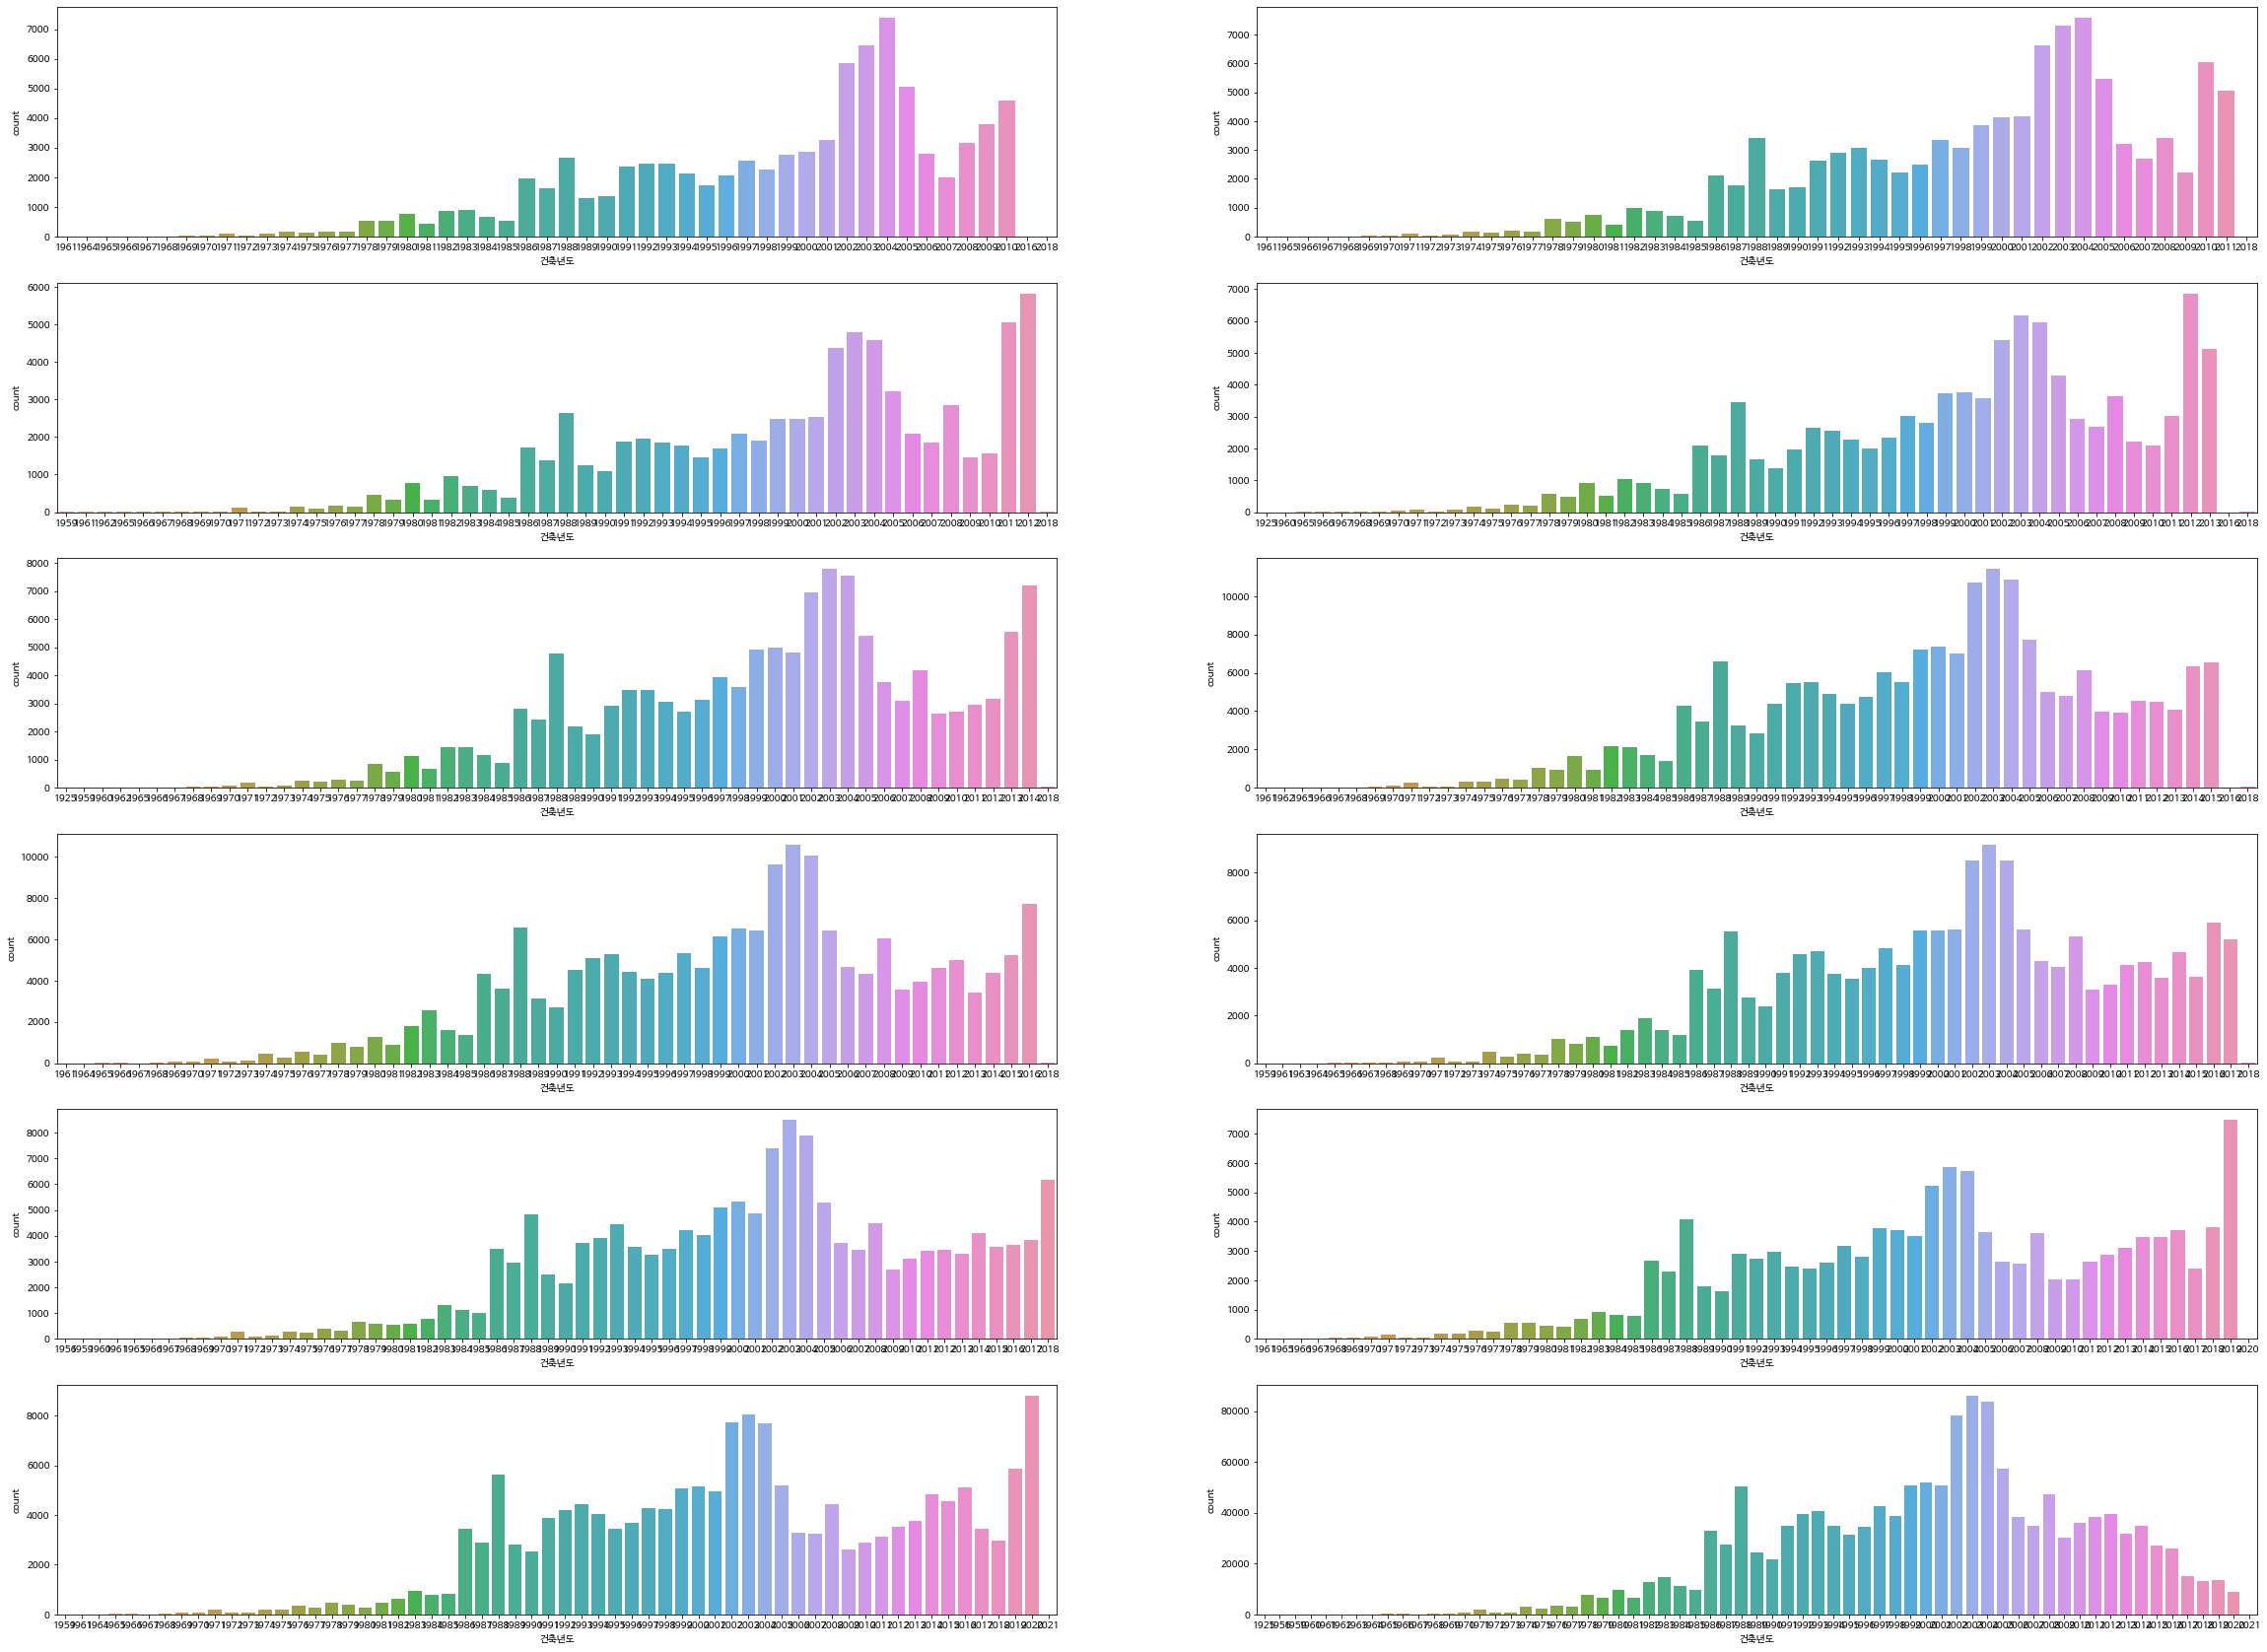

In [ ]:
fig, axes = plt.subplots(6,2, figsize=(40,30))
lst = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]

for i in range(len(lst)):
  plt.subplot(6,2,i+1)
  sns.countplot(x='건축년도', data=lst[i])

plt.subplot( 6, 2, 12)
sns.countplot(x='건축년도', data=df_new)

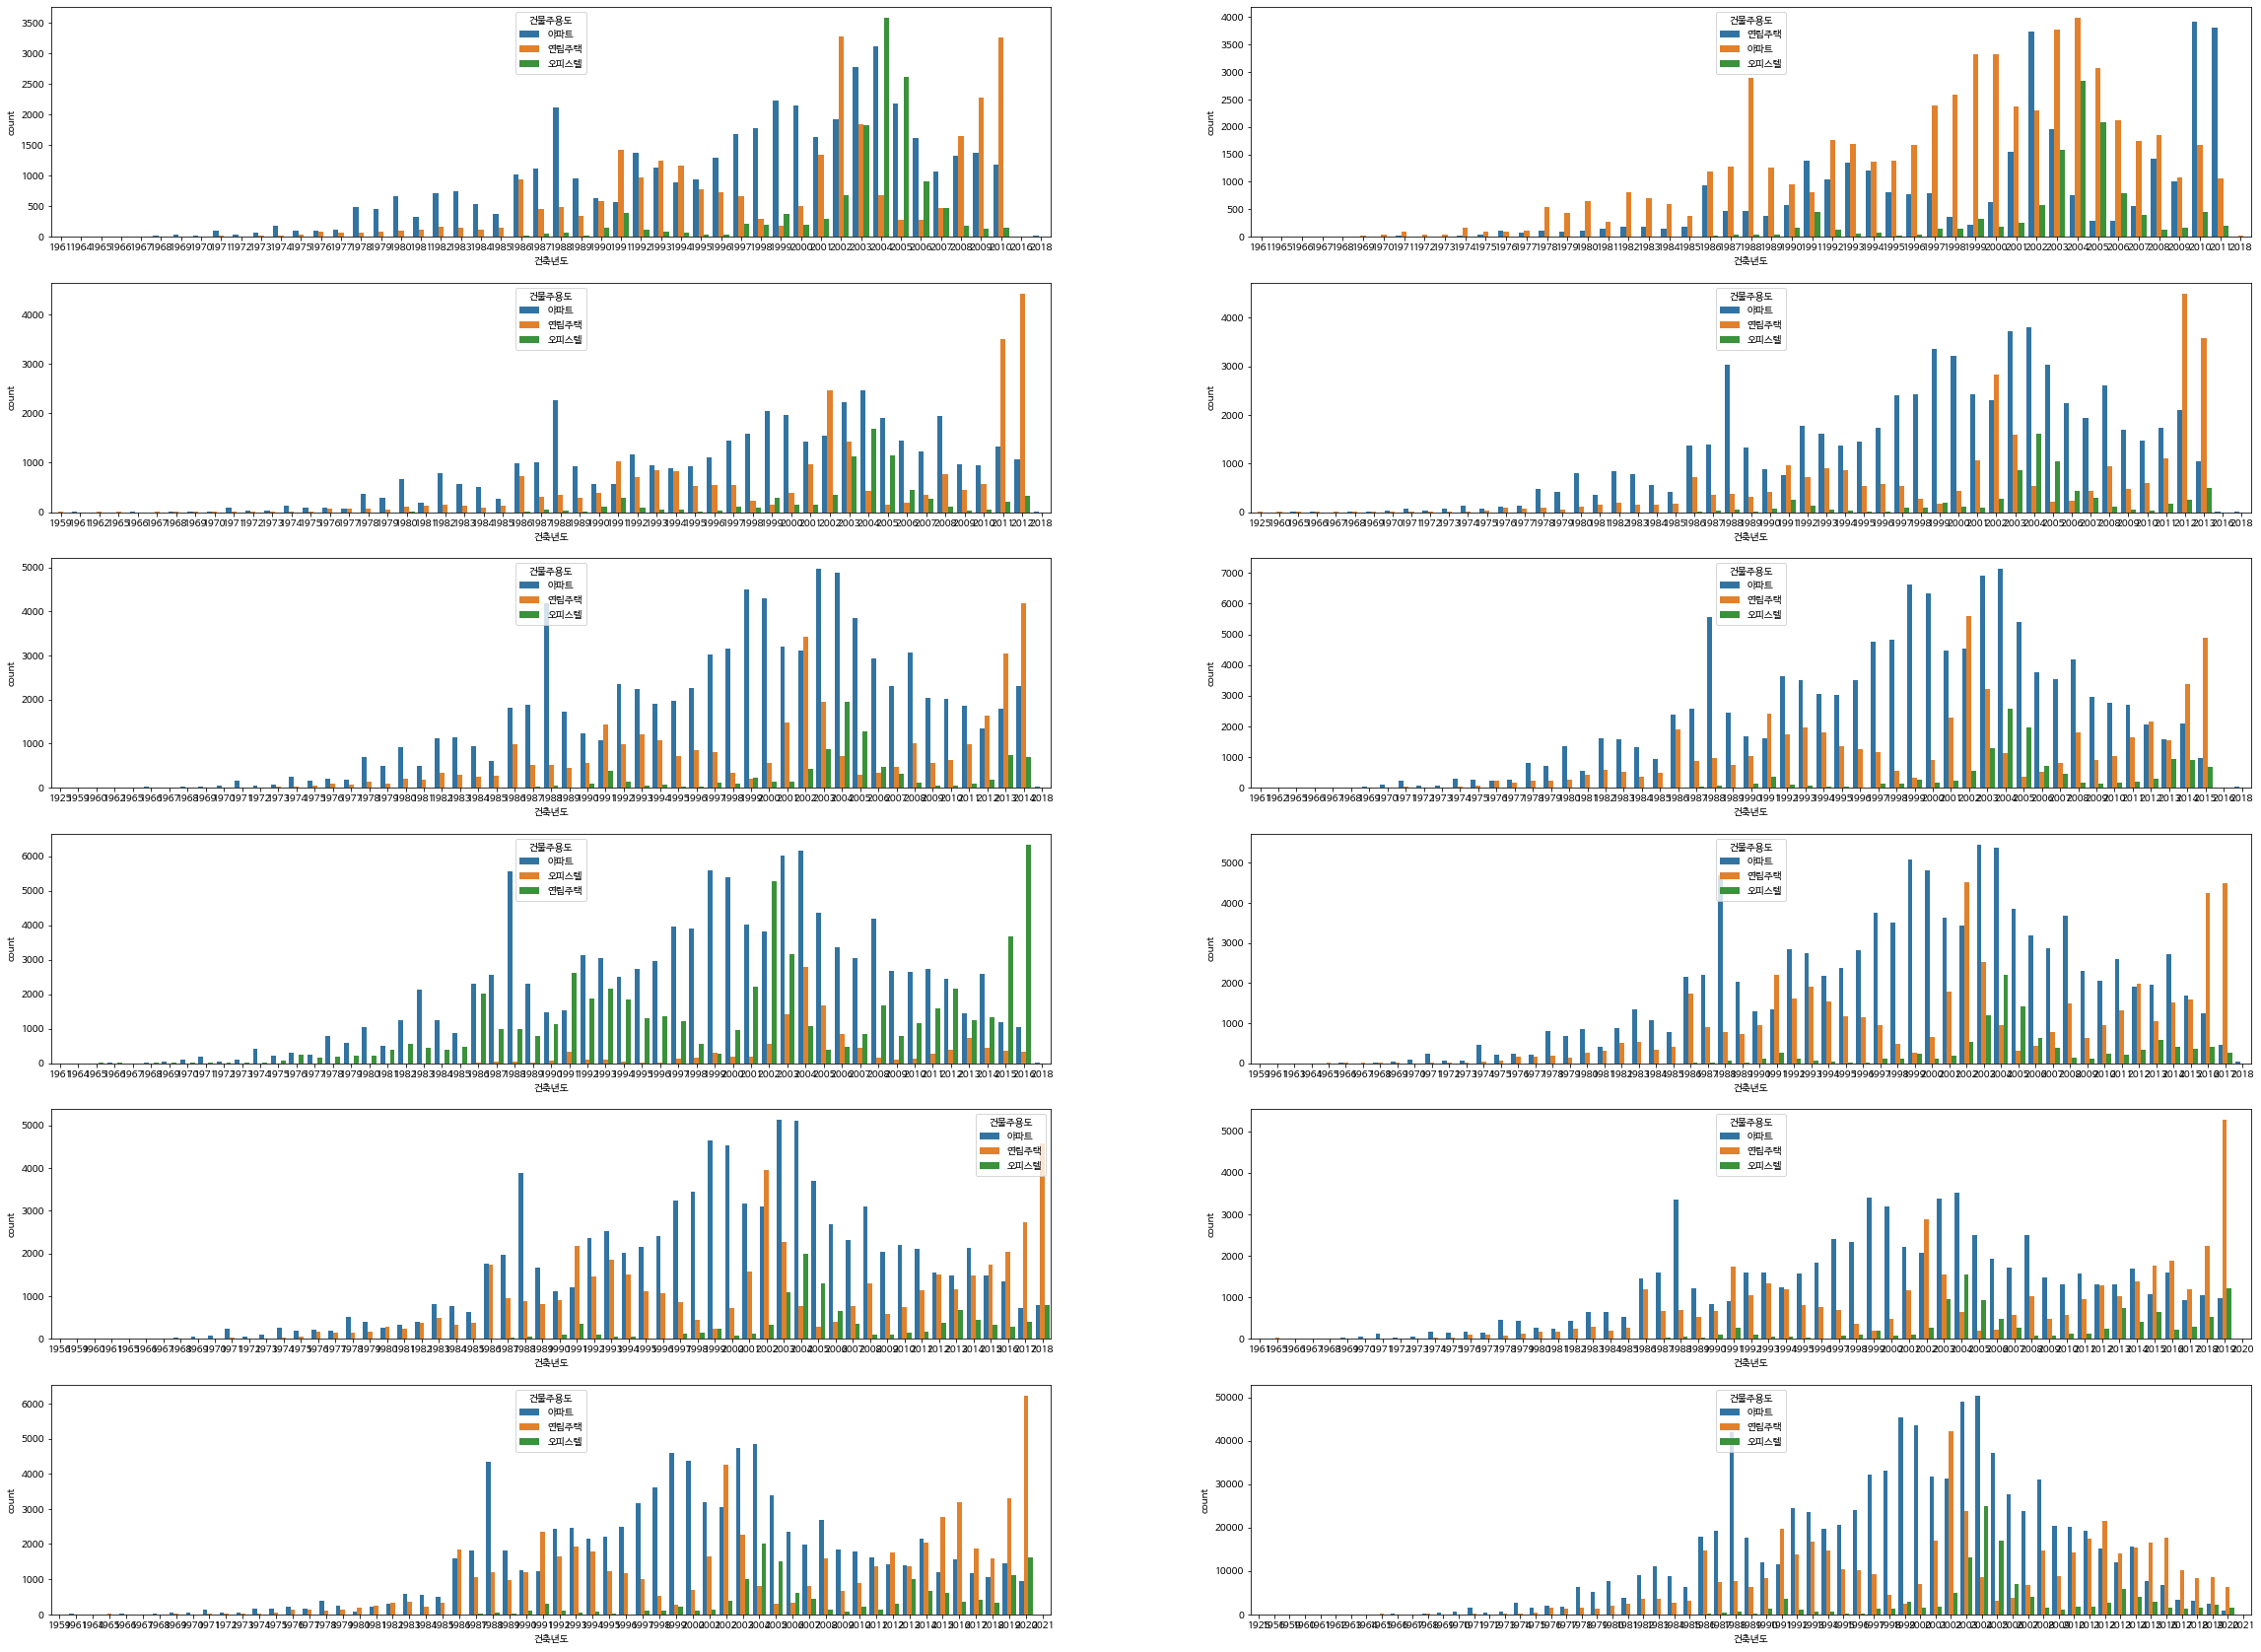

In [ ]:
fig, axes = plt.subplots(6,2, figsize=(40,30))
lst = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]

for i in range(len(lst)):
  plt.subplot(6,2,i+1)
  sns.countplot(x='건축년도', data=lst[i], hue = "건물주용도" )

plt.subplot( 6, 2, 12)
sns.countplot(x='건축년도', data=df_new, hue = "건물주용도" )